In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')
plt.style.use('_mpl-gallery')
font = {'fontsize':16, 'fontstyle':'italic', 'backgroundcolor':'black', 'color':'white'} # for plot title

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV, KFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.naive_bayes import MultinomialNB, ComplementNB, CategoricalNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [6]:
data = pd.read_csv('/content/drug_classification.csv')
data

Age Sex      BP Cholesterol  Na_to_K Drug_Type
0     23   F    HIGH        HIGH   25.355     DrugY
1     47   M     LOW        HIGH   13.093     drugC
2     47   M     LOW        HIGH   10.114     drugC
3     28   F  NORMAL        HIGH    7.798     drugX
4     61   F     LOW        HIGH   18.043     DrugY
..   ...  ..     ...         ...      ...       ...
195   56   F     LOW        HIGH   11.567     drugC
196   16   M     LOW        HIGH   12.006     drugC
197   52   M  NORMAL        HIGH    9.894     drugX
198   23   M  NORMAL      NORMAL   14.020     drugX
199   40   F     LOW      NORMAL   11.349     drugX

[200 rows x 6 columns]

In [7]:
df = pd.DataFrame(data)
print(f'df Shape: {df.shape}')
df.head()

df Shape: (200, 6)


Age Sex      BP Cholesterol  Na_to_K Drug_Type
0   23   F    HIGH        HIGH   25.355     DrugY
1   47   M     LOW        HIGH   13.093     drugC
2   47   M     LOW        HIGH   10.114     drugC
3   28   F  NORMAL        HIGH    7.798     drugX
4   61   F     LOW        HIGH   18.043     DrugY

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug_Type    200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
df.isna().sum().to_frame('isna').T

Age  Sex  BP  Cholesterol  Na_to_K  Drug_Type
isna    0    0   0            0        0          0

In [10]:
for col in df:
    print(f"{col}: {df[col].unique()}\n")

Age: [23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]

Sex: ['F' 'M']

BP: ['HIGH' 'LOW' 'NORMAL']

Cholesterol: ['HIGH' 'NORMAL']

Na_to_K: [25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127  8

In [11]:
print(f"Number of dublicated: {df.duplicated().sum()}")

Number of dublicated: 0


In [12]:
categorical = df.select_dtypes(['object'])
for var in categorical:
    print(f"{var} contains {df[var].nunique()} labels")
    print(df[var].value_counts())
    print('-'*30)

Sex contains 2 labels
Sex
M    104
F     96
Name: count, dtype: int64
------------------------------
BP contains 3 labels
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
------------------------------
Cholesterol contains 2 labels
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
------------------------------
Drug_Type contains 5 labels
Drug_Type
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64
------------------------------


In [13]:
df2 = df.copy()
df2['Sex'] = df2.Sex.replace(['M', 'F'], [3, 2])
df2['BP'] = df2.BP.replace(['HIGH', 'NORMAL', 'LOW'], [4, 3, 2])
df2['Cholesterol'] = df2.Cholesterol.replace(['HIGH', 'NORMAL'], [3, 2])
df2['Drug_Type'] = df2.Drug_Type.replace(['DrugY', 'drugX', 'drugA', 'drugC', 'drugB'], [1, 2, 3, 4, 5])
df2

Age  Sex  BP  Cholesterol  Na_to_K  Drug_Type
0     23    2   4            3   25.355          1
1     47    3   2            3   13.093          4
2     47    3   2            3   10.114          4
3     28    2   3            3    7.798          2
4     61    2   2            3   18.043          1
..   ...  ...  ..          ...      ...        ...
195   56    2   2            3   11.567          4
196   16    3   2            3   12.006          4
197   52    3   3            3    9.894          2
198   23    3   3            2   14.020          2
199   40    2   2            2   11.349          2

[200 rows x 6 columns]

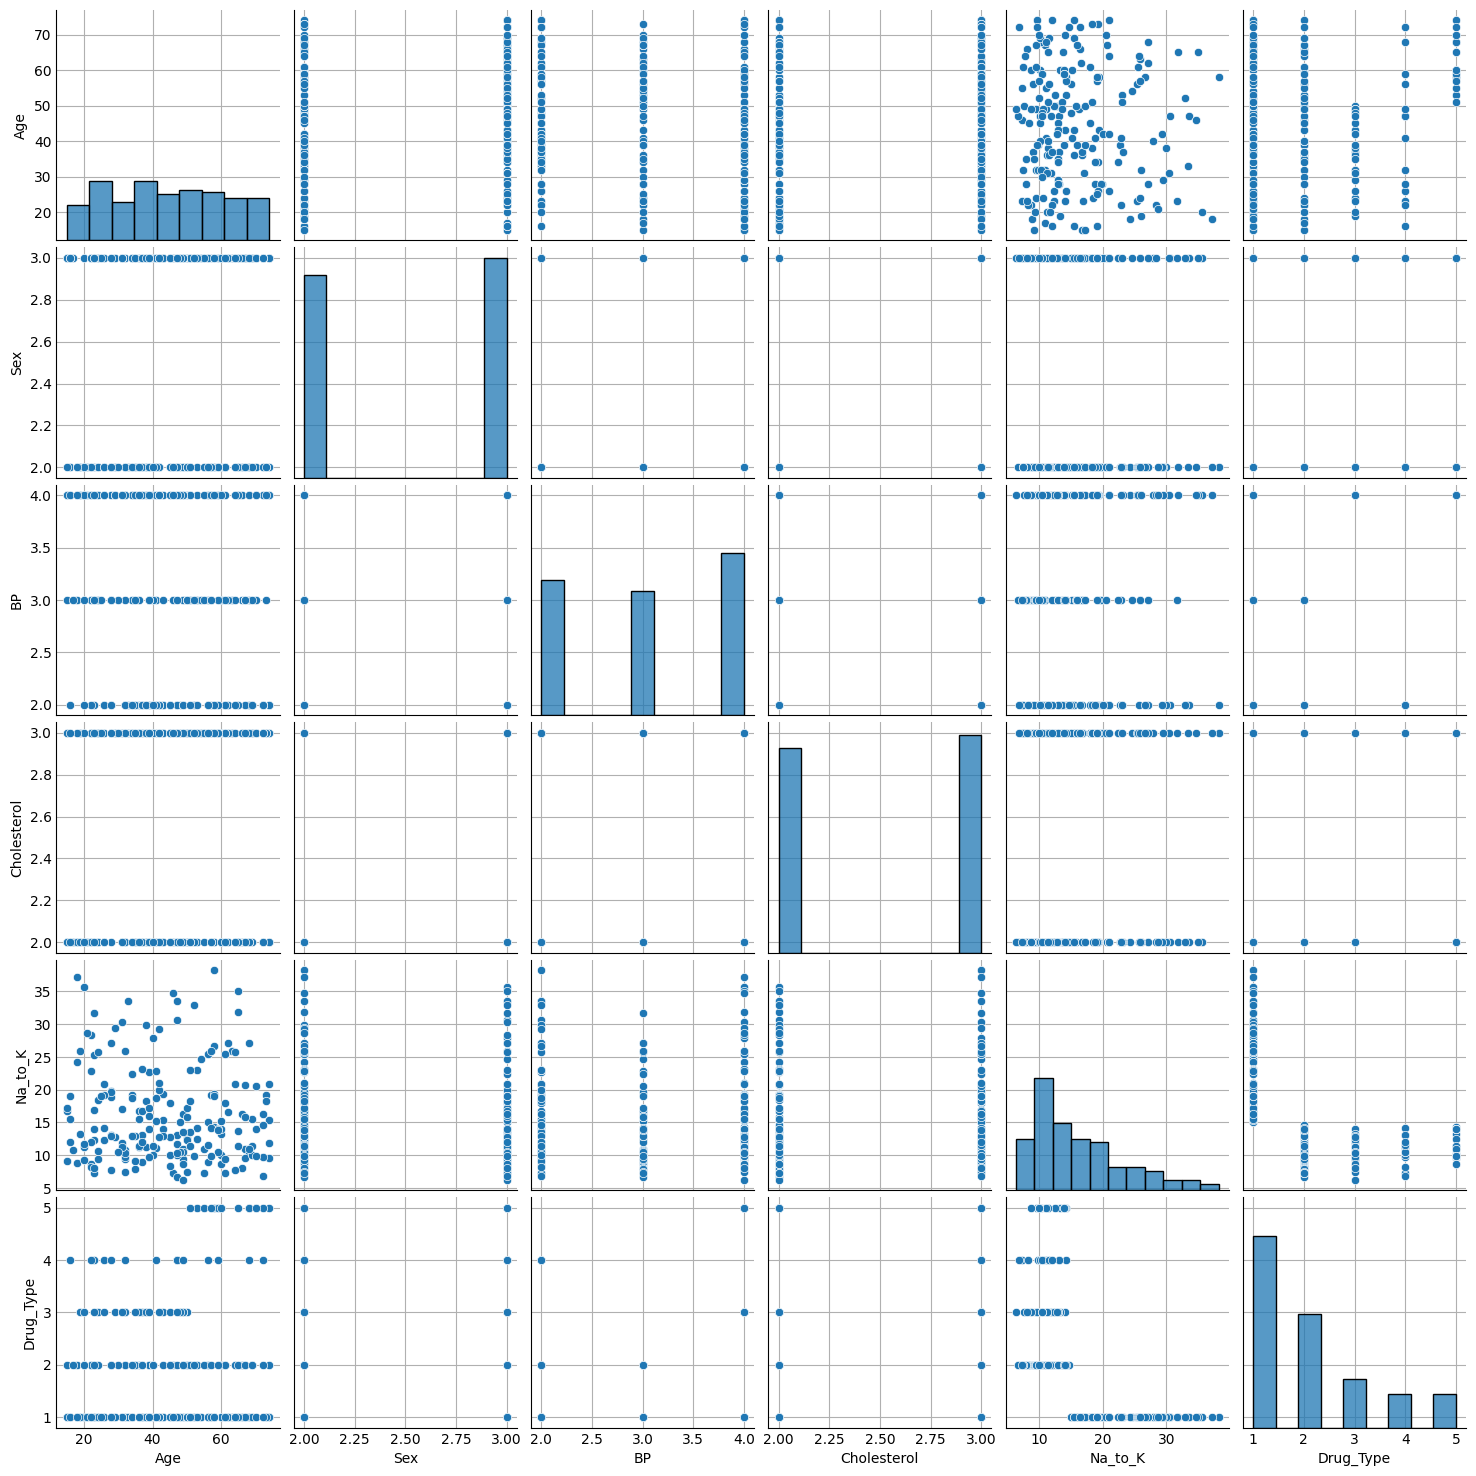

In [14]:
%matplotlib inline
sns.pairplot(df2)
plt.show()

In [15]:
df2.isna().sum().to_frame().T

Age  Sex  BP  Cholesterol  Na_to_K  Drug_Type
0    0    0   0            0        0          0

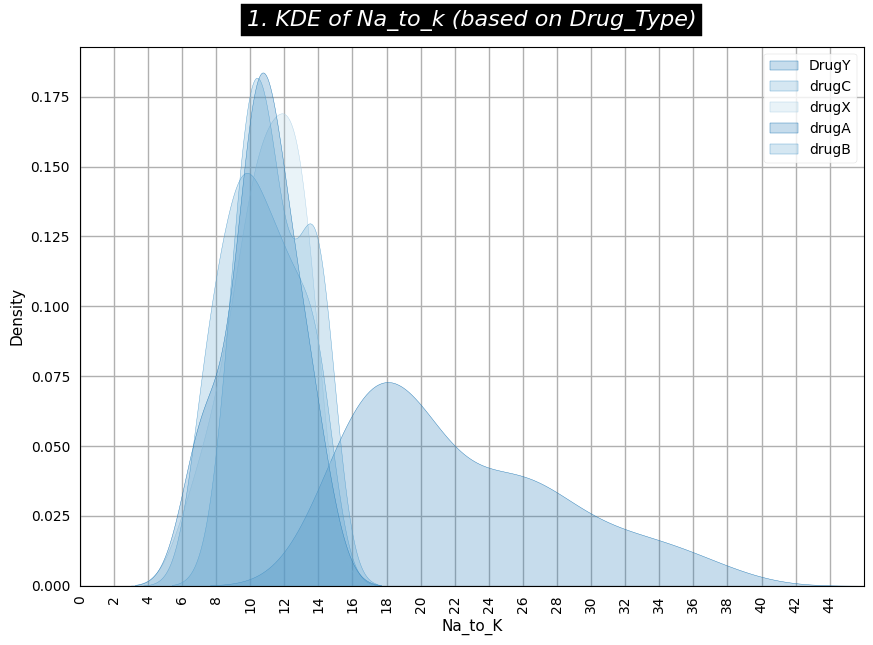

In [16]:
%matplotlib inline
plt.style.use('seaborn-notebook')
for i, label in enumerate(df.Drug_Type.unique().tolist()):
    sns.kdeplot(df2.loc[df2['Drug_Type'] == i+1, 'Na_to_K'], label=label, shade=True)
plt.title('1. KDE of Na_to_k (based on Drug_Type)', fontdict=font, pad=15)
plt.xticks(np.arange(0,46,2), rotation=90)
plt.xlim([0,46])
plt.legend()
plt.show()

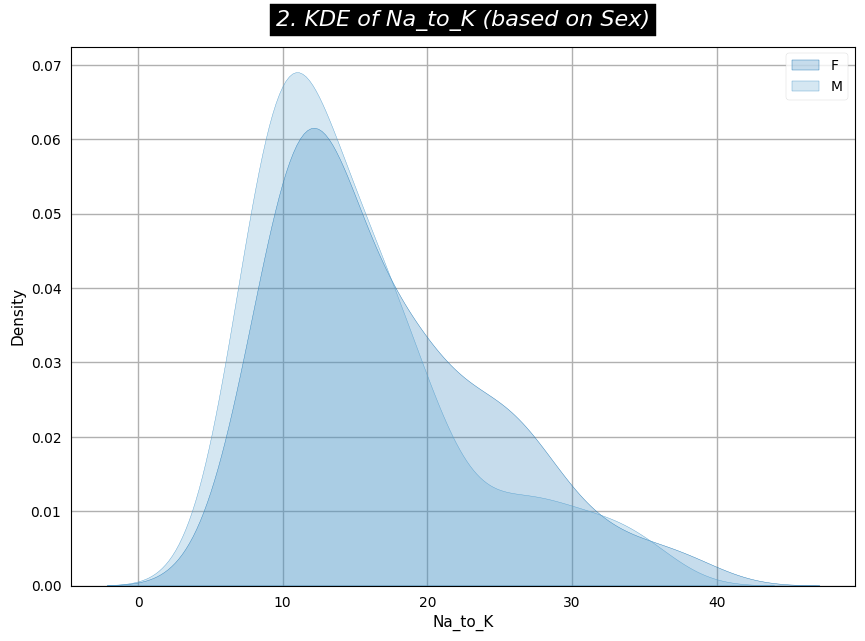

In [17]:
for i, label in enumerate(df.Sex.unique().tolist()):
    sns.kdeplot(df2.loc[df2['Sex'] == i+2, 'Na_to_K'], label=label, shade=True)
plt.title('2. KDE of Na_to_K (based on Sex)', fontdict=font, pad=15)
# plt.xticks(np.arange(0,91,5), rotation=90)
# plt.xlim([0,90])
plt.legend()
plt.show()

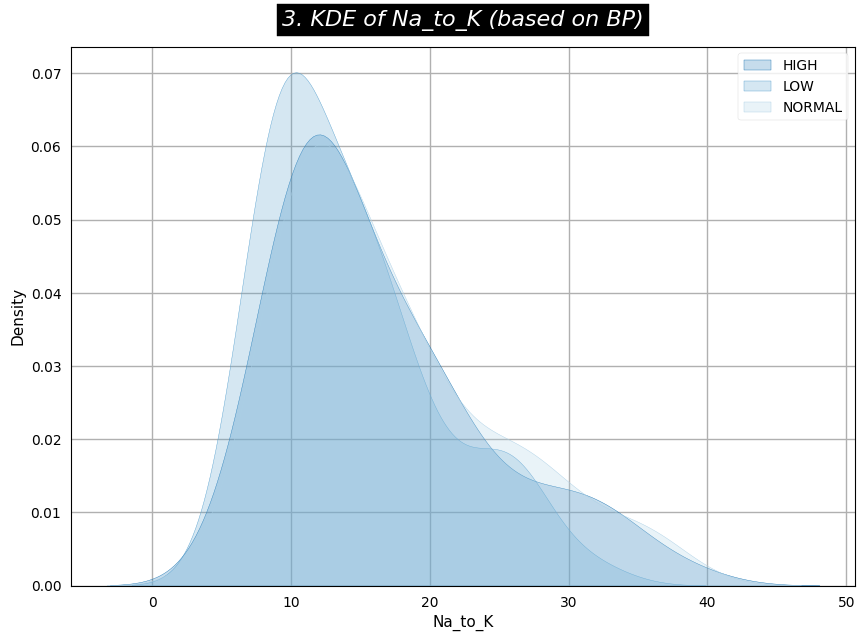

In [18]:
for i, label in enumerate(df.BP.unique().tolist()):
    sns.kdeplot(df2.loc[df2['BP'] == i+2, 'Na_to_K'], label=label, shade=True)
plt.title('3. KDE of Na_to_K (based on BP)', fontdict=font, pad=15)
# plt.xticks(np.arange(0,91,5), rotation=90)
# plt.xlim([0,90])
plt.legend()
plt.show()

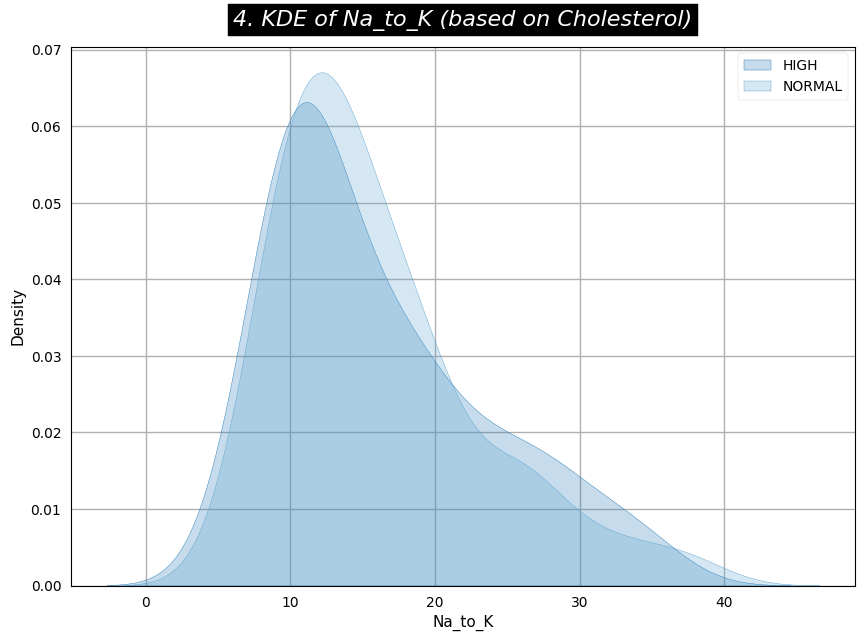

In [19]:
for i, label in enumerate(df.Cholesterol.unique().tolist()):
    sns.kdeplot(df2.loc[df2['Cholesterol'] == i+2, 'Na_to_K'], label=label, shade=True)
plt.title('4. KDE of Na_to_K (based on Cholesterol)', fontdict=font, pad=15)
# plt.xticks(np.arange(0,91,5), rotation=90)
# plt.xlim([0,90])
plt.legend()
plt.show()

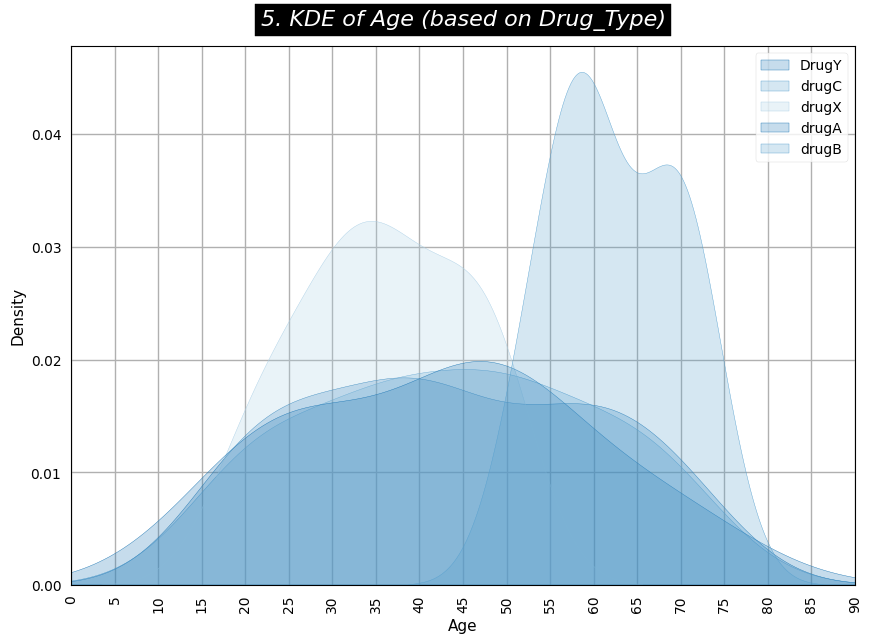

In [20]:
for i, label in enumerate(df.Drug_Type.unique().tolist()):
    sns.kdeplot(df2.loc[df2['Drug_Type'] == i+1, 'Age'], label=label, shade=True)
plt.title('5. KDE of Age (based on Drug_Type)', fontdict=font, pad=15)
plt.xticks(np.arange(0,91,5), rotation=90)
plt.xlim([0,90])
plt.legend()
plt.show()

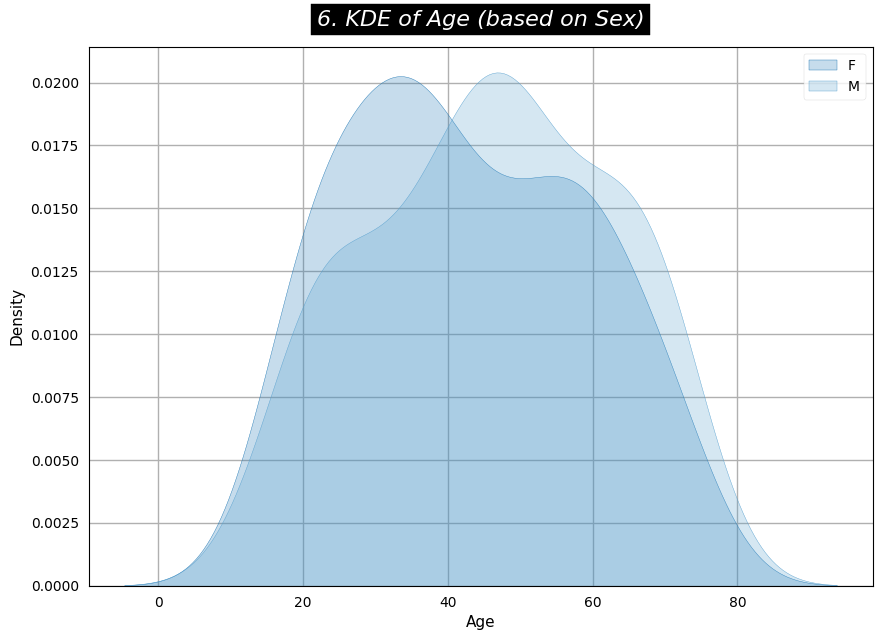

In [21]:
for i, label in enumerate(df.Sex.unique().tolist()):
    sns.kdeplot(df2.loc[df2['Sex'] == i+2, 'Age'], label=label, shade=True)
plt.title('6. KDE of Age (based on Sex)', fontdict=font, pad=15)
# plt.xticks(np.arange(0,91,5), rotation=90)
# plt.xlim([0,90])
plt.legend()
plt.show()

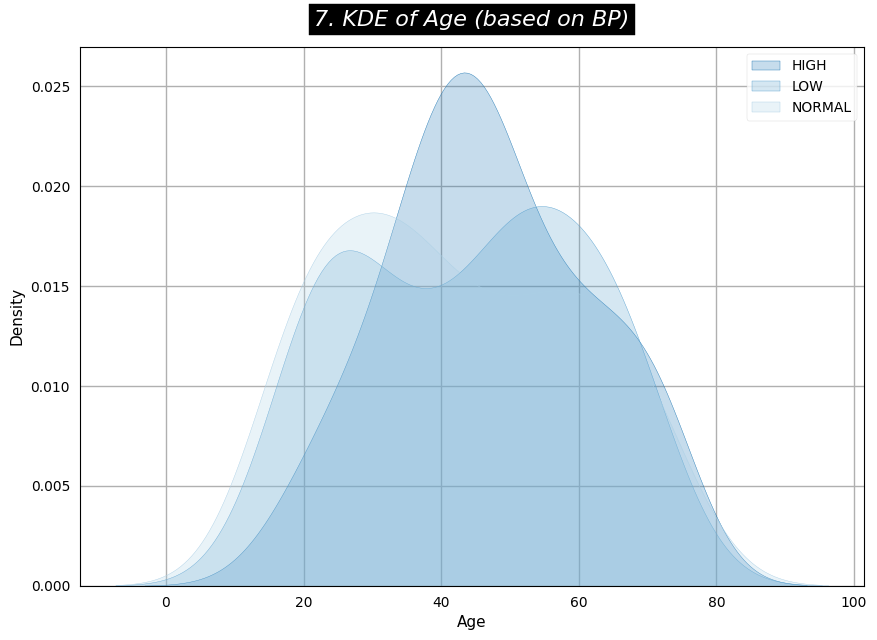

In [22]:
for i, label in enumerate(df.BP.unique().tolist()):
    sns.kdeplot(df2.loc[df2['BP'] == i+2, 'Age'], label=label, shade=True)
plt.title('7. KDE of Age (based on BP)', fontdict=font, pad=15)
# plt.xticks(np.arange(0,91,5), rotation=90)
# plt.xlim([0,90])
plt.legend()
plt.show()

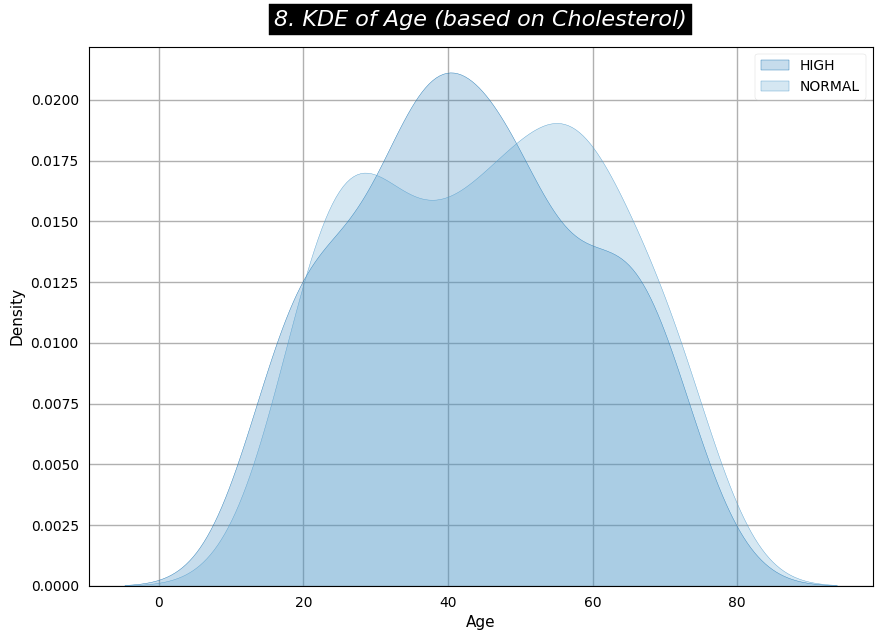

In [23]:
for i, label in enumerate(df.Cholesterol.unique().tolist()):
    sns.kdeplot(df2.loc[df2['Cholesterol'] == i+2, 'Age'], label=label, shade=True)
plt.title('8. KDE of Age (based on Cholesterol)', fontdict=font, pad=15)
# plt.xticks(np.arange(0,91,5), rotation=90)
# plt.xlim([0,90])
plt.legend()
plt.show()

In [24]:
df2.describe().round(3).T

count    mean     std     min     25%     50%    75%     max
Age          200.0  44.315  16.544  15.000  31.000  45.000  58.00  74.000
Sex          200.0   2.520   0.501   2.000   2.000   3.000   3.00   3.000
BP           200.0   3.065   0.839   2.000   2.000   3.000   4.00   4.000
Cholesterol  200.0   2.515   0.501   2.000   2.000   3.000   3.00   3.000
Na_to_K      200.0  16.084   7.224   6.269  10.446  13.936  19.38  38.247
Drug_Type    200.0   2.060   1.271   1.000   1.000   2.000   3.00   5.000

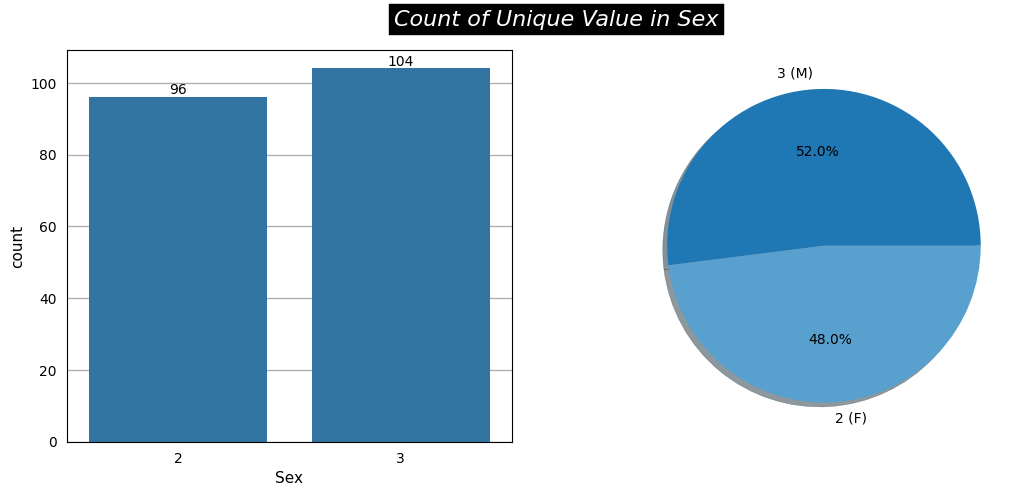

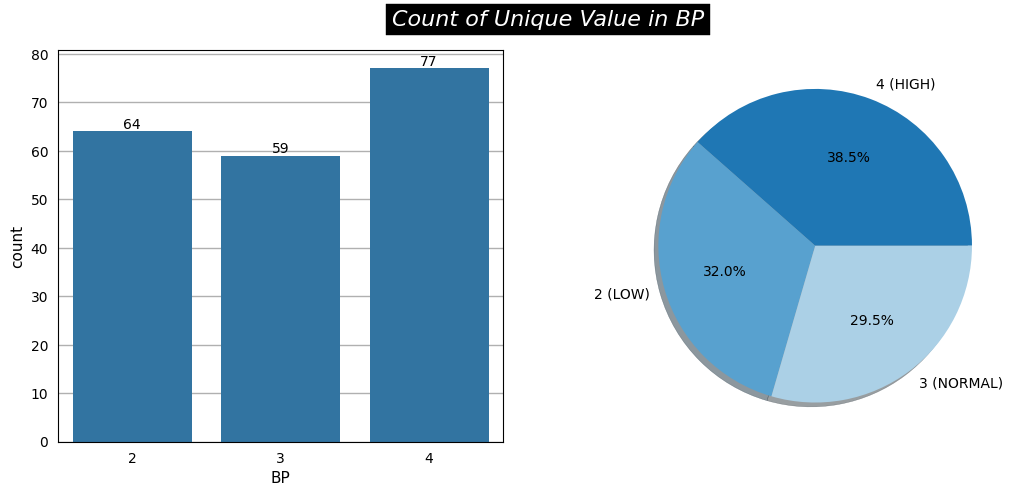

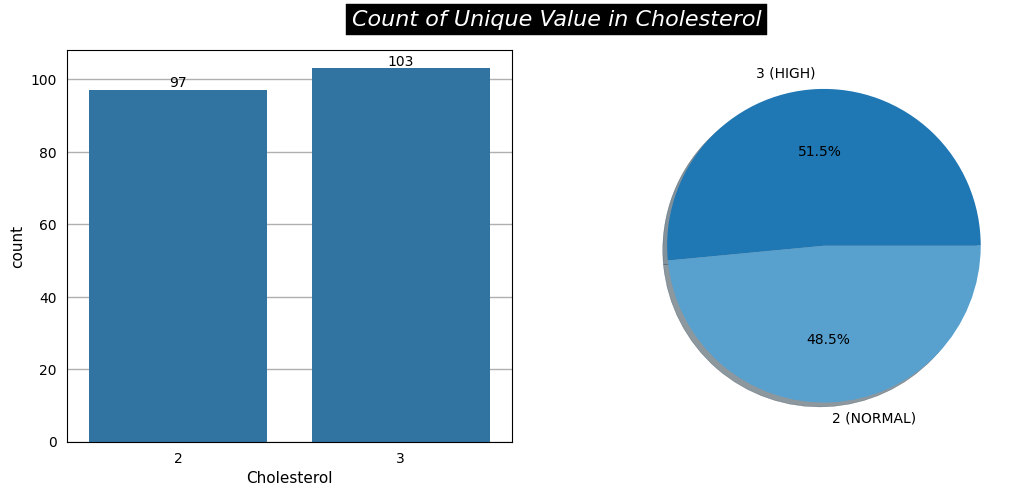

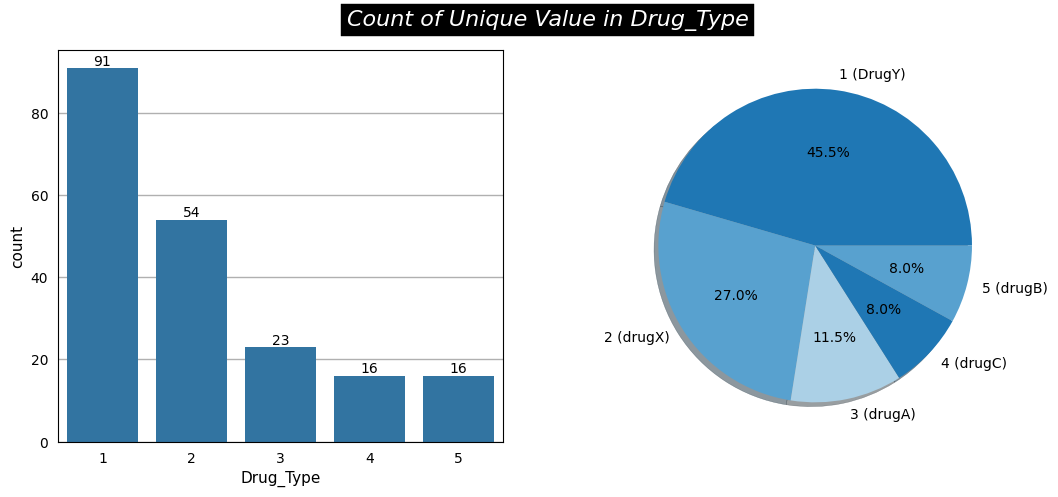

In [25]:
for col in categorical:

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # count of col (countplot)
    sns.countplot(data=df2, x=col, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    # count of col (pie chart)
    slices = df2[col].value_counts().values
    activities = [f"{i} ({var})" for i, var in zip(df2[col].value_counts().index, df[col].value_counts().index)]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f'Count of Unique Value in {col}', y=1.09, **font)
    plt.show()

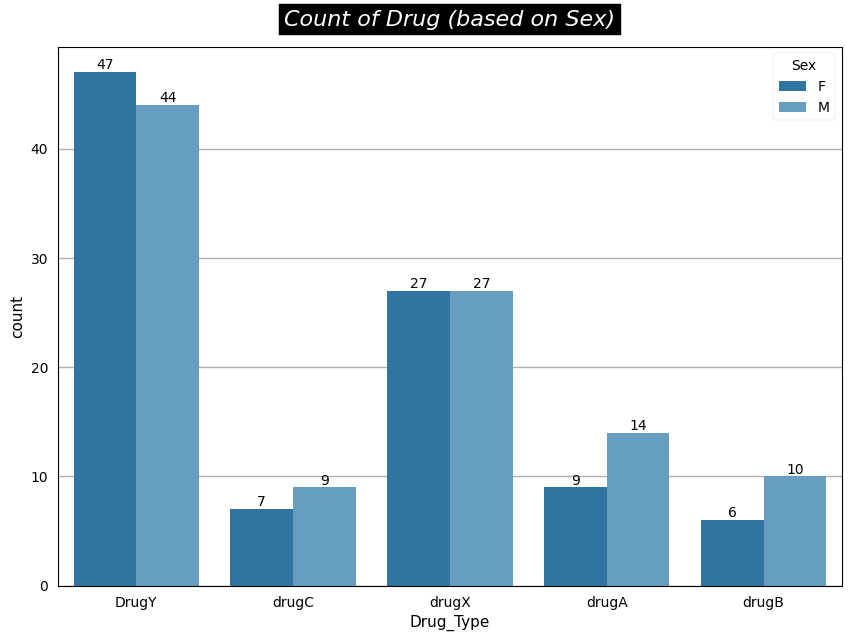

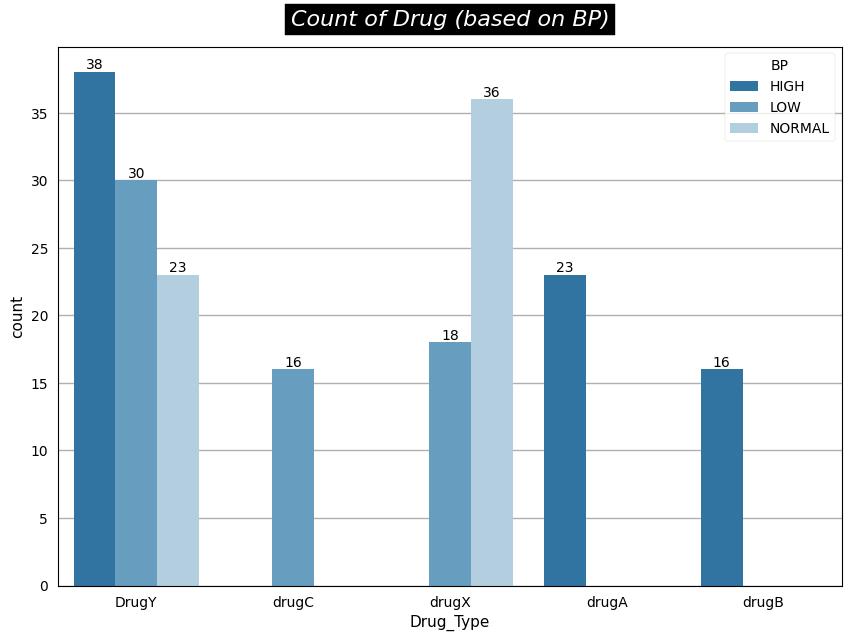

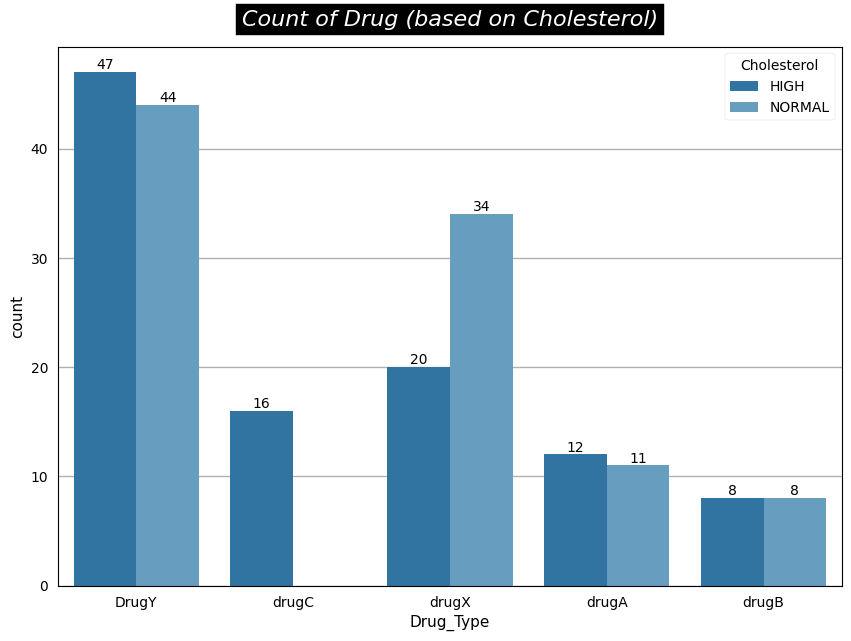

In [26]:
%matplotlib inline
for col in ['Sex','BP','Cholesterol']:
    ax = sns.countplot(data=df, x='Drug_Type', hue=col)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Count of Drug (based on {col})', fontdict=font, pad=15)
    plt.show()

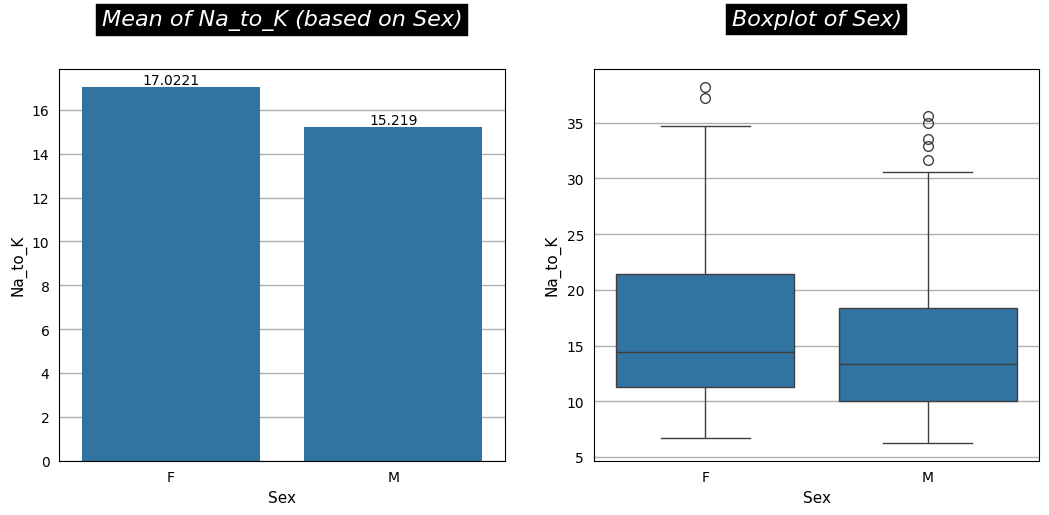

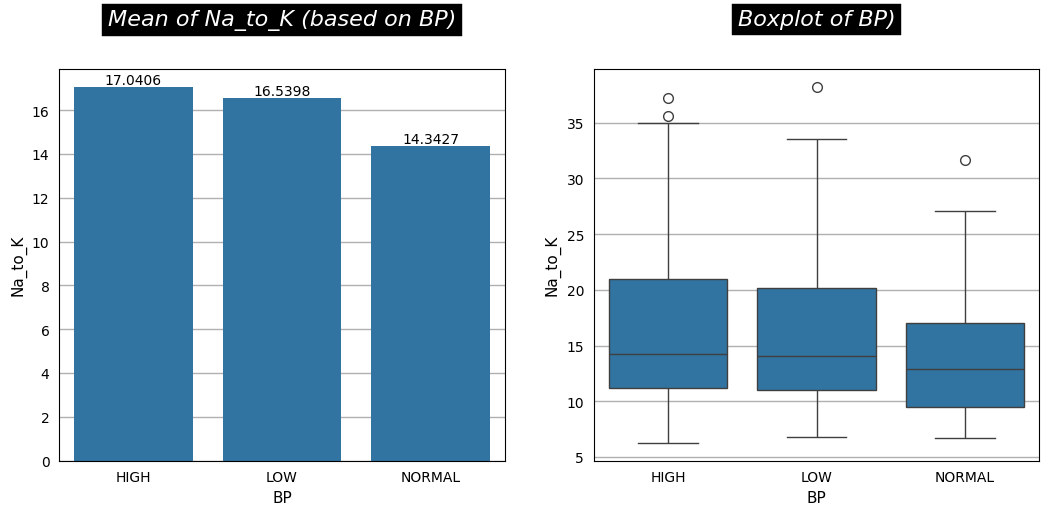

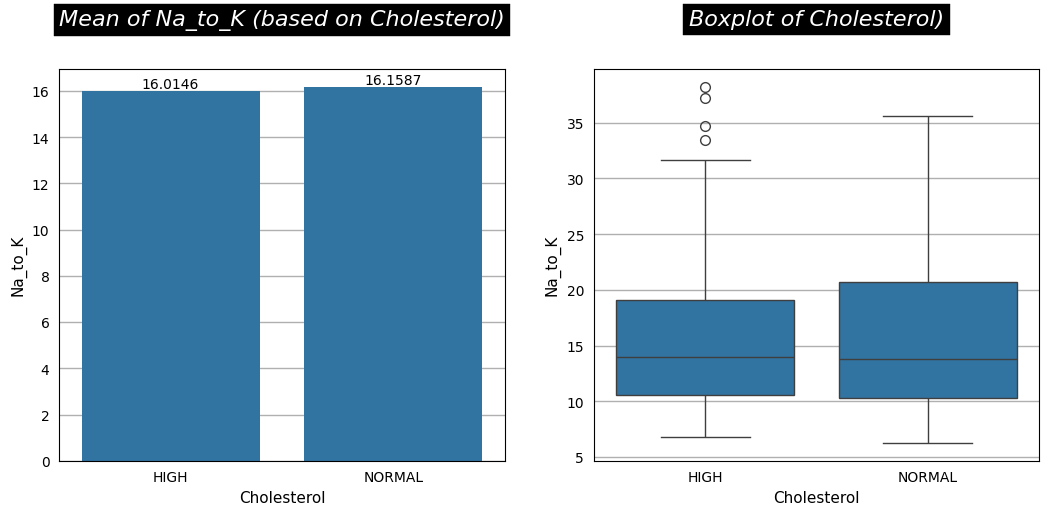

In [27]:
for col in ['Sex', 'BP', 'Cholesterol']:
    fig , ax= plt.subplots(1,2, figsize=(10,4))
    gp = df.groupby([col])['Na_to_K'].mean().to_frame().reset_index()
    sns.barplot(data=gp, x=col, y='Na_to_K', ax=ax[0])
    for container in ax[0].containers:
        ax[0].bar_label(container)
    ax[0].set_title(f'Mean of Na_to_K (based on {col})', y=1.09, **font)

    sns.boxplot(data=df, x=col, y='Na_to_K', ax=ax[1])
    ax[1].set_title(f'Boxplot of {col})', y=1.09, **font)

    plt.show()

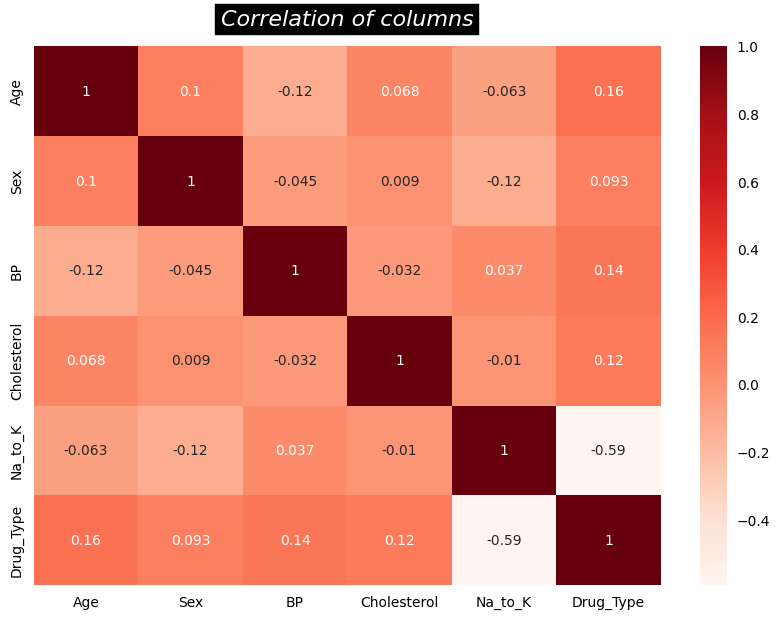

In [28]:
sns.heatmap(round(df2.corr(),3), cmap='Reds', annot=True)
plt.title('Correlation of columns', fontdict=font, pad=15)
plt.show()

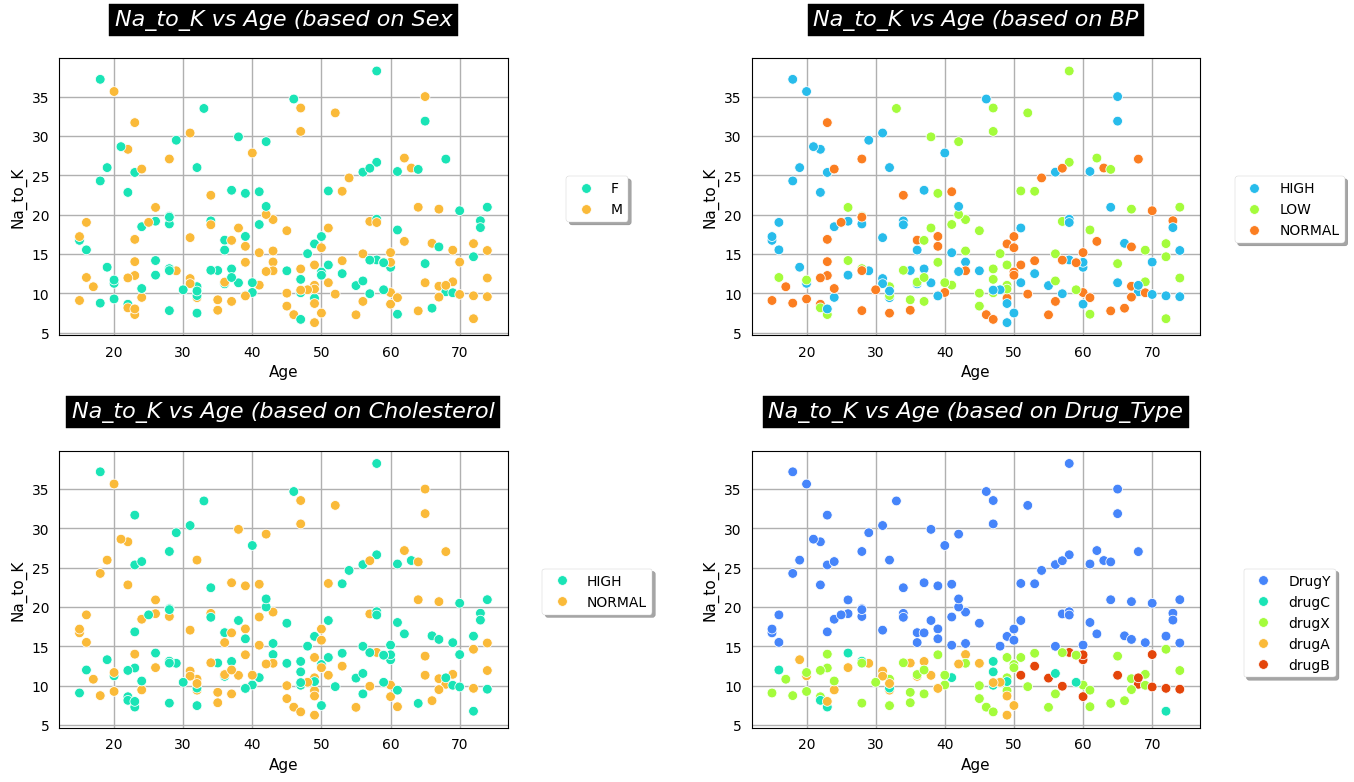

In [29]:
fig, ax = plt.subplots(2,2,figsize=(14,8))
for i, col in enumerate(['Sex', 'BP', 'Cholesterol', 'Drug_Type']):
    sns.scatterplot(data=df, x='Age', y='Na_to_K', hue=col, ax=ax[i//2, i%2], palette='turbo')
    ax[i//2, i%2].set_title(f'Na_to_K vs Age (based on {col}', y=1.09, **font)
    ax[i//2, i%2].legend(loc='upper center', bbox_to_anchor=(1.2, 0.6),
        fancybox=True, shadow=True)

fig.tight_layout()
plt.show()

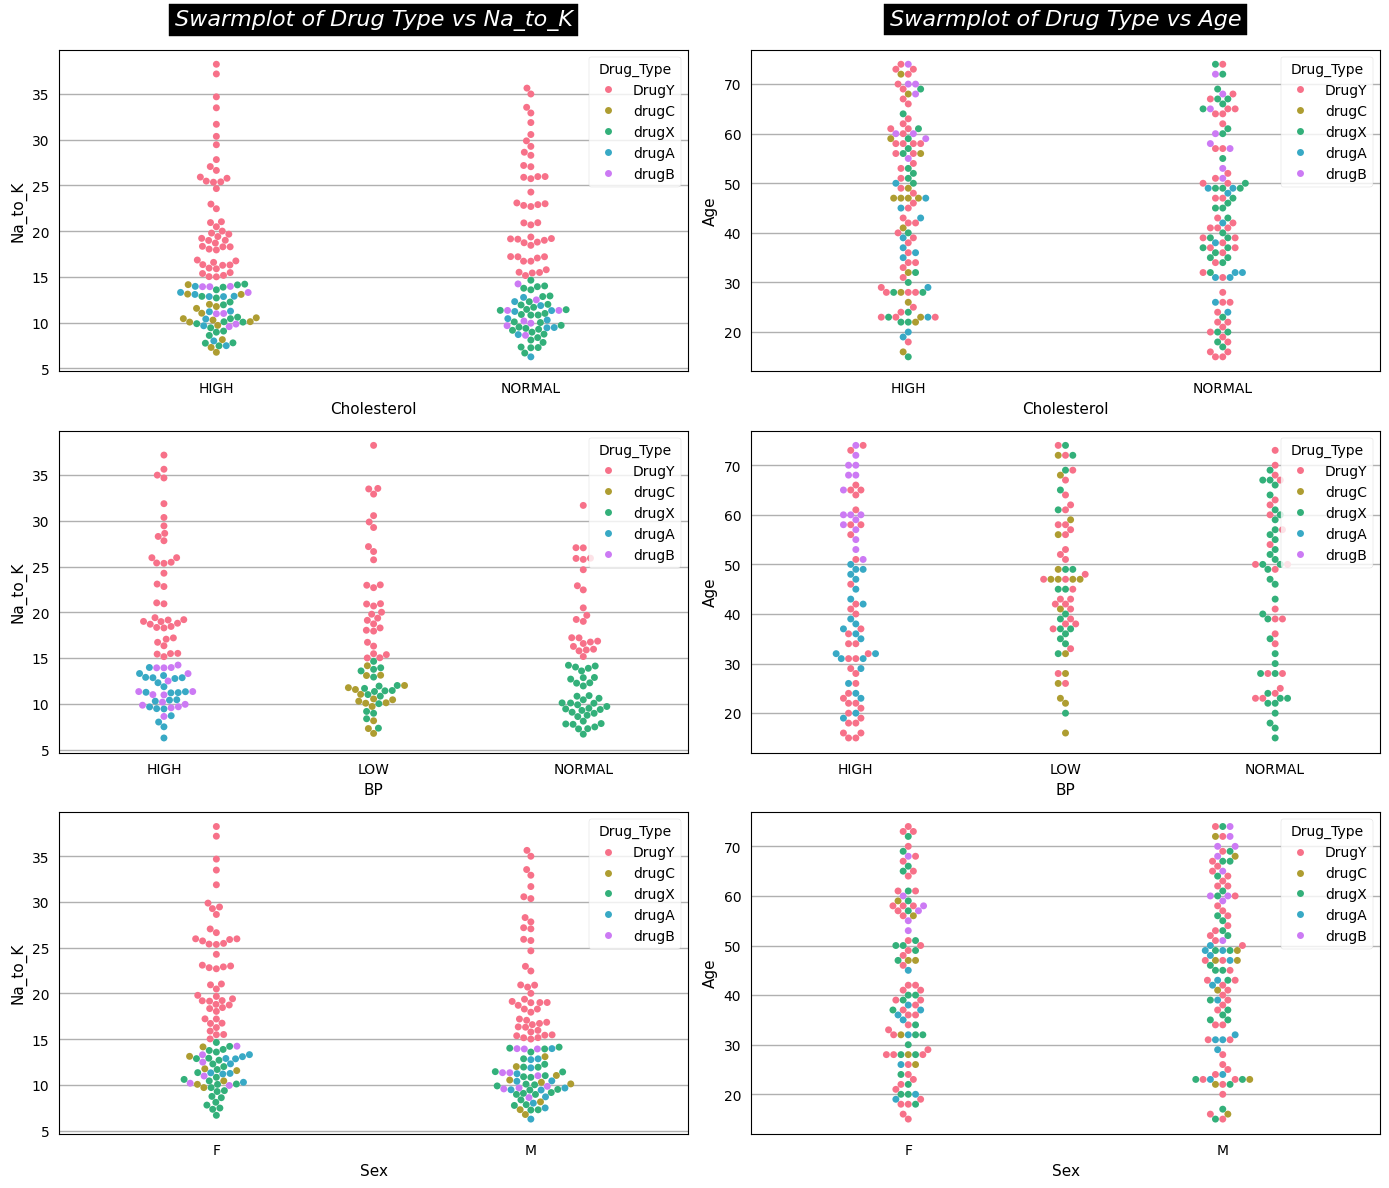

In [30]:
fig, ax = plt.subplots(3,2,figsize=(14,12))
sns.swarmplot(data=df, x='Cholesterol', y='Na_to_K', hue='Drug_Type', ax=ax[0,0])
sns.swarmplot(data=df, x='Cholesterol', y='Age', hue='Drug_Type', ax=ax[0,1])
sns.swarmplot(data=df, x='BP', y='Na_to_K', hue='Drug_Type', ax=ax[1,0])
sns.swarmplot(data=df, x='BP', y='Age', hue='Drug_Type', ax=ax[1,1])
sns.swarmplot(data=df, x='Sex', y='Na_to_K', hue='Drug_Type', ax=ax[2,0])
sns.swarmplot(data=df, x='Sex', y='Age', hue='Drug_Type', ax=ax[2,1])
ax[0,0].set_title('Swarmplot of Drug Type vs Na_to_K',y=1.05, **font)
ax[0,1].set_title('Swarmplot of Drug Type vs Age',y=1.05, **font)
plt.tight_layout()
plt.show()

In [31]:
df3 = df.copy()
df3

Age Sex      BP Cholesterol  Na_to_K Drug_Type
0     23   F    HIGH        HIGH   25.355     DrugY
1     47   M     LOW        HIGH   13.093     drugC
2     47   M     LOW        HIGH   10.114     drugC
3     28   F  NORMAL        HIGH    7.798     drugX
4     61   F     LOW        HIGH   18.043     DrugY
..   ...  ..     ...         ...      ...       ...
195   56   F     LOW        HIGH   11.567     drugC
196   16   M     LOW        HIGH   12.006     drugC
197   52   M  NORMAL        HIGH    9.894     drugX
198   23   M  NORMAL      NORMAL   14.020     drugX
199   40   F     LOW      NORMAL   11.349     drugX

[200 rows x 6 columns]

In [32]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df3['Age_binned'] = pd.cut(df3['Age'], bins=bin_age, labels=category_age)
df3 = df3.drop(['Age'], axis = 1)

In [33]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df3['Na_to_K_binned'] = pd.cut(df3['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df3 = df3.drop(['Na_to_K'], axis = 1)

In [34]:
df4 = pd.get_dummies(df3.drop('Drug_Type', axis=1))
df4.insert(18, 'Drug_Type', df3.Drug_Type)
df4['Drug_Type'] = df4.Drug_Type.replace(['DrugY', 'drugX', 'drugA', 'drugC', 'drugB'], [1, 2, 3, 4, 5])
df4

Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  Cholesterol_HIGH  \
0     True  False     True   False      False              True   
1    False   True    False    True      False              True   
2    False   True    False    True      False              True   
3     True  False    False   False       True              True   
4     True  False    False    True      False              True   
..     ...    ...      ...     ...        ...               ...   
195   True  False    False    True      False              True   
196  False   True    False    True      False              True   
197  False   True    False   False       True              True   
198  False   True    False   False       True             False   
199   True  False    False    True      False             False   

     Cholesterol_NORMAL  Age_binned_<20s  Age_binned_20s  Age_binned_30s  \
0                 False            False            True           False   
1                 False            False           False           False   
2                 False            False           False           False   
3                 False            False            True           False   
4                 False            False           False           False   
..                  ...              ...             ...             ...   
195               False            False           False           False   
196               False             True           False           False   
197               False            False           False           False   
198                True            False            True           False   
199                True            False           False           False   

     Age_binned_40s  Age_binned_50s  Age_binned_60s  Age_binned_>60s  \
0             False           False           False            False   
1              True           False           False            False   
2              True           False           False            False   
3             False           False           False            False   
4             False           False            True            False   
..              ...             ...             ...              ...   
195           False            True           False            False   
196           False           False           False            False   
197           False            True           False            False   
198           False           False           False            False   
199            True           False           False            False   

     Na_to_K_binned_<10  Na_to_K_binned_10-20  Na_to_K_binned_20-30  \
0                 False                 False                  True   
1                 False                  True                 False   
2                 False                  True                 False   
3                  True                 False                 False   
4                 False                  True                 False   
..                  ...                   ...                   ...   
195               False                  True                 False   
196               False                  True                 False   
197               False                  True                 False   
198               False                  True                 False   
199               False                  True                 False   

     Na_to_K_binned_>30  Drug_Type  
0                 False          1  
1                 False          4  
2                 False          4  
3                 False          2  
4                 False          1  
..                  ...        ...  
195               False          4  
196               False          4  
197               False          2  
198               False          2  
199               False          2  

[200 rows x 19 columns]

In [35]:
x = np.asanyarray(df4.drop('Drug_Type', axis=1))
y = df4.Drug_Type.values.reshape(-1,1)

In [36]:
FPR = []
TPR = []
ACC_test = []
ACC_train = []
Recall = []
Precision = []
F1 = []
AUC = []

def delete_results():
    """Delete results of Previous models for preveing to avoid congestion in ROC charts"""
    global FPR, TPR, ACC_test, ACC_train, Recall, Precision, F1, AUC
    del FPR[:]
    del TPR[:]
    del ACC_test[:]
    del ACC_train[:]
    del Recall[:]
    del Precision[:]
    del F1[:]
    del AUC[:]

def plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
        cm(array): confusion matrix
        classes(dictionary): classes of our target (key=categorical type, value=numerical type)
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, [f"{value}={key}" for key , value in classes.items()], rotation=45)
    plt.yticks(tick_marks, [f"{value}={key}" for key , value in classes.items()])

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]}\n{round(cm[i,j]/np.sum(cm)*100, 4)}%",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------------------------------------

def Perform_cross_val(model, k, x, y, scoring):
    """
    perform cross validation
        model: model
        k(scaler): the value for n_splits in KFold()
        x(DataFrame or array):  x_train
        y(DataFrame or array): y_train
        scoring(string): an approach for evaluation in cross validation
    """

    kf = KFold(n_splits=k)
    cv_results = cross_val_score(model, x, y.ravel(), cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)
    print('-'*20, f"CV for k={k}, scoring={scoring}", '-'*20)
    print(f"CV mean: {cv_mean}")
    print(f"CV results: {cv_results}\n")

# --------------------------------------------------------------------------------------

def find_fold_index(k, x):
    """
    Find fold index in kfold
        k(scaler): the value used for n_splits in KFold()
        x(DataFrame or array): x_train
    """

    my_fold_index = []
    j=1
    for _ , test in KFold(k).split(x):

        my_fold_index = []
        for i in test:
            my_fold_index.append(i)
        print(f"fold {j}: [{my_fold_index[0]},{my_fold_index[-1]}]")
        print(20*'-')
        j += 1

# --------------------------------------------------------------------------------------

def plot_results(FPR, TPR, ACC_test, ACC_train, Recall, Precision, F1, classes):
    """
    draw ROC curve and plot of Recall, precision, f1 score etc.
        FPR(list): list of False Positive Rate
        TPR(list): list of True Positive Rate
        ACC(list): list of accuracy of models
        Recall(list): list of recall score of models
        Precision(list): list of Precision score of models
        F1(list): list of F1 score of models
        classes(dictionary): classes of our target (key=categorical type, value=numerical type)
    """
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    # plot model evaluation
    ax[0].set_title('Model Evaluation Results', fontdict=font, y=1.02)
    sns.lineplot(data=pd.DataFrame({'accoracy': ACC_test, 'Recall': Recall,
                                    'Precision': Precision, 'F1 score': F1}),
                                    markers=True, ax=ax[0])
    ax[0].set_xlabel('M')
    ax[0].set_ylabel('Evaluation')
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)

    # plot model evaluation
    ax[1].set_title('Model Accuracy Results for train and test', fontdict=font, y=1.02)
    sns.lineplot(data=pd.DataFrame({'test accuracy': ACC_test, 'train accuracy': ACC_train}),
                                    markers=True, ax=ax[1])
    ax[1].set_xlabel('M')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)
    plt.show()

    # plot ROC curve for all classes in all model
    if len(FPR) > 1:
        i=1
        fig, ax = plt.subplots(1,5,figsize=(25,10))
        for fpr, tpr, auc_i in zip(FPR, TPR, AUC):
            for j in range(0,5):
                ax[j].plot(fpr[j], tpr[j], label=f"(M{i}) class{i} (AUC = {round(auc_i[classes[j+1]],3)})")
                ax[j].set_xlabel('FPR')
                ax[j].set_ylabel('TPR')
            i += 1

        for k in range(0,5):
            ax[k].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
                fancybox=True, shadow=True)
            ax[k].set_title(f'ROC Curve of Class {classes[k+1]}({k+1})', fontdict=font, y=1.02)

        plt.tight_layout()
        plt.show()

# --------------------------------------------------------------------------------------

def modeling(clf, x, y, test_size, classes, columns):

    # split data to train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    print(20*'-', 'Shape', 20*'-')
    print(f"x_train: {x_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test: {y_test.shape}")



    # define model and fit model
    clf.fit(x_train, y_train.ravel())

    # prediction and results
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    y_proba_train = clf.predict_proba(x_train)
    y_proba_test = clf.predict_proba(x_test)

    # Applying the OvR strategy to multiclass problems
    targets = clf.classes_
    roc_auc_ovr = {}
    fpr_i = []
    tpr_i = []

    fig, ax = plt.subplots(2, 5, figsize=(25, 10))
    for i in range(len(targets)):
        # Gets the class
        c = targets[i]
        # Prepares an auxiliar dataframe to help with the plots
        df_aux = pd.DataFrame(x_test.copy(), columns= columns)
        df_aux['class'] = [1 if y == c else 0 for y in y_test]
        df_aux['prob'] = y_proba_test[:, i]
        df_aux = df_aux.reset_index(drop = True)

        # Plots the probability distribution for the class and the rest
        bins = [count/20 for count in range(20)] + [1]
        sns.histplot(data=df_aux, x="prob", hue='class', color='b', ax=ax[0,i], bins=bins)
        ax[0,i].set_title(classes[c], y=1.09, fontdict=font)
        ax[0,i].legend([f"Class: {classes[c]}", "Rest"])
        ax[0,i].set_xlabel(f"P(x = {classes[c]})")

        # Calculates the ROC Coordinates and plots the ROC Curves
        fpr, tpr, _ = metrics.roc_curve(df_aux['class'], df_aux['prob'])
        # Calculates the ROC AUC OvR
        roc_auc_ovr[classes[c]] = metrics.roc_auc_score(df_aux['class'], df_aux['prob'])
        ax[1,i].plot(fpr, tpr, label=f"ROC curve class {classes[c]} (AUC = {round(roc_auc_ovr[classes[c]],3)})")
        ax[1,i].set_title(f"ROC Curve OvR Class: {classes[c]}", y=1.09, fontdict=font)
        ax[1,i].legend()

        # append result
        fpr_i.append(fpr)
        tpr_i.append(tpr)

    plt.tight_layout()
    plt.show

    cm = metrics.confusion_matrix(y_test, y_pred_test)
    acc_test = metrics.accuracy_score(y_test, y_pred_test)
    acc_train = metrics.accuracy_score(y_train, y_pred_train)
    rec = metrics.recall_score(y_test, y_pred_test, average='micro')
    pre = metrics.precision_score(y_test, y_pred_test, average='micro')
    f1 = metrics.f1_score(y_test, y_pred_test, average='micro')

    # append results
    FPR.append(fpr_i)
    TPR.append(tpr_i)
    ACC_test.append(acc_test)
    ACC_train.append(acc_train)
    Recall.append(rec)
    Precision.append(pre)
    F1.append(f1)
    AUC.append(roc_auc_ovr)

    plot_results(FPR, TPR, ACC_test, ACC_train, Recall, Precision, F1, classes)

    # Evaluation model
    print('-'*20 , 'Confusion Matrix', '-'*20)
    print(cm)
    plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    # or use plot_confusion_matrix from sklearn.metrics
    print('-'*20 , 'Classification Report', '-'*20)
    print(metrics.classification_report(y_test, y_pred_test, ), '\n')
    print(f"Jaccard Score: {metrics.jaccard_score(y_test, y_pred_test, average='micro')}", '\n')

    # print other result about predicted data
    return acc_test, acc_train, y_pred_test

-------------------- Shape --------------------
x_train: (160, 18)
y_train: (160, 1)
x_test: (40, 18)
y_test: (40, 1)


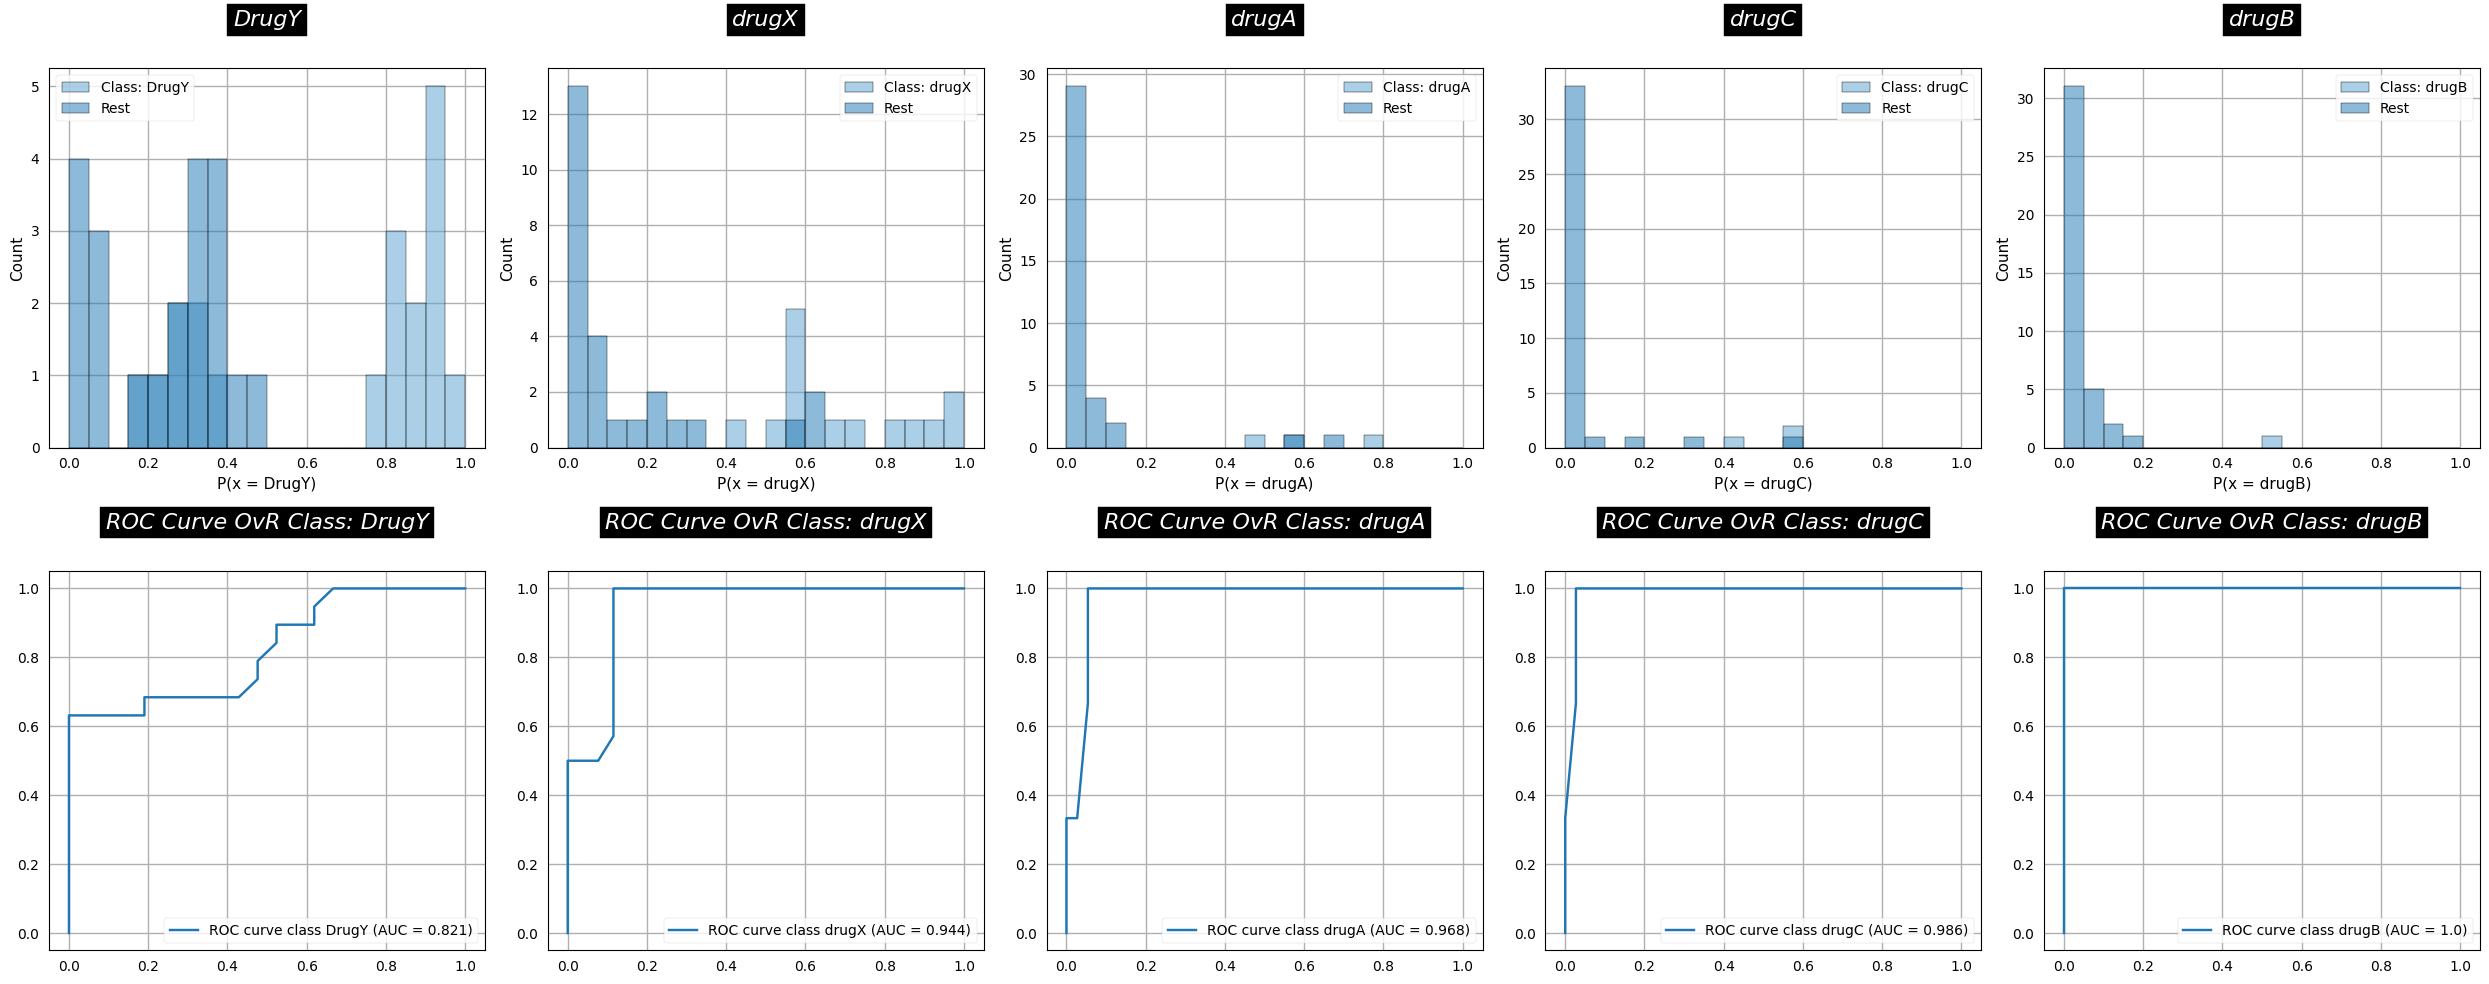

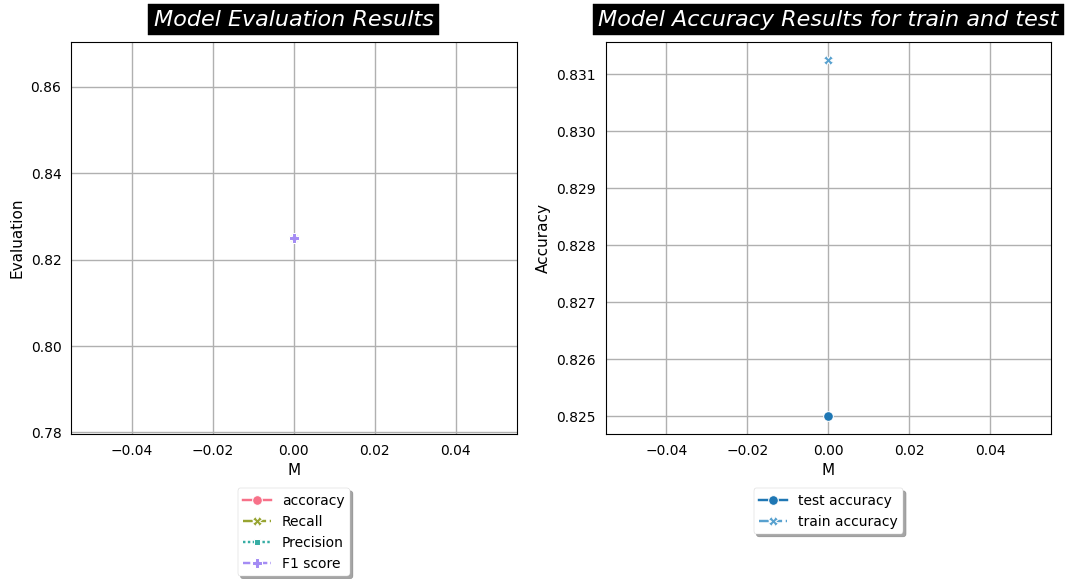

-------------------- Confusion Matrix --------------------
[[13  3  2  1  0]
 [ 1 13  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  1]]


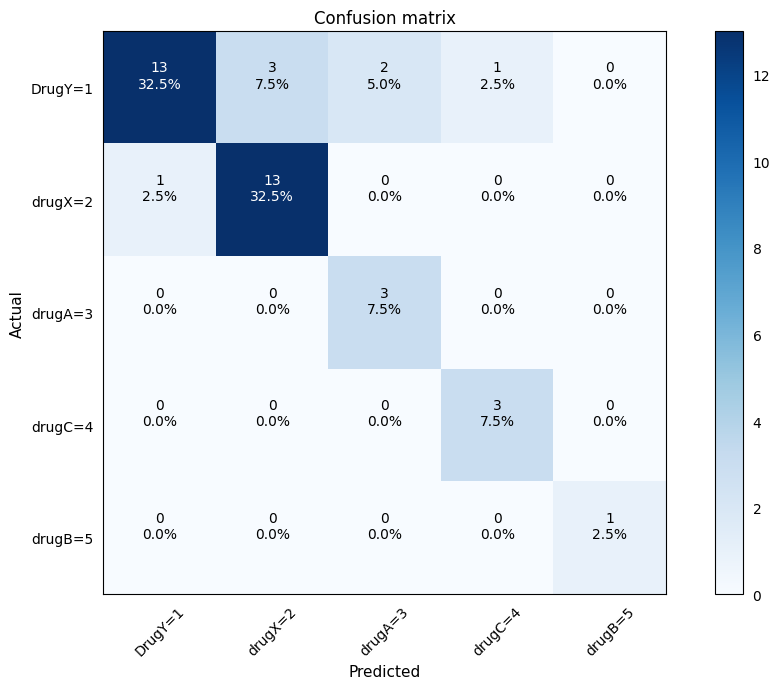

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           1       0.93      0.68      0.79        19
           2       0.81      0.93      0.87        14
           3       0.60      1.00      0.75         3
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1

    accuracy                           0.82        40
   macro avg       0.82      0.92      0.85        40
weighted avg       0.85      0.82      0.82        40
 

Jaccard Score: 0.7021276595744681 



In [37]:
%matplotlib inline
clf1 = MultinomialNB()
classes = {i+1:j for i,j in enumerate(df.Drug_Type.value_counts().index)}
columns= df4.drop('Drug_Type', axis=1).columns.tolist()
acc_test1, acc_train1, _ = modeling(clf1, x, y, 0.2, classes, columns)

In [38]:
test_sizes= [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
acc_table = pd.DataFrame(columns=['Model', 'test_size', 'ACC_train', 'ACC_test'])
for i, test_size in enumerate(test_sizes):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    clf = MultinomialNB()
    clf.fit(x_train, y_train.ravel())
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    acc_test_i = metrics.accuracy_score(y_test, y_pred_test)
    acc_train_i = metrics.accuracy_score(y_train, y_pred_train)
    acc_table.loc[len(acc_table.index)] = [f"Model 1_{i}", str(test_size), acc_train_i, acc_test_i]
acc_table.sort_values(by=['ACC_test'], ascending=False).style.background_gradient(cmap='summer_r')

In [39]:
clf = MultinomialNB()
Perform_cross_val(clf, 10, x, y, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.75
CV results: [0.85 0.85 0.7  0.8  0.7  0.85 0.7  0.75 0.6  0.7 ]



In [40]:
best_model_test = pd.DataFrame({'Model':[], 'test_size':[], 'Test_Accuracy':[]})
best_model_train = pd.DataFrame({'Model':[], 'test_size':[], 'Train_Accuracy':[]})
# add best model and its acc_test and acc_train
best_model_test.loc[len(best_model_test.index)] = [f"Multinomial NB", '0.2', acc_test1]
best_model_train.loc[len(best_model_train.index)] = [f"Multinomial NB", '0.2', acc_train1]

In [41]:
delete_results()

-------------------- Shape --------------------
x_train: (160, 18)
y_train: (160, 1)
x_test: (40, 18)
y_test: (40, 1)


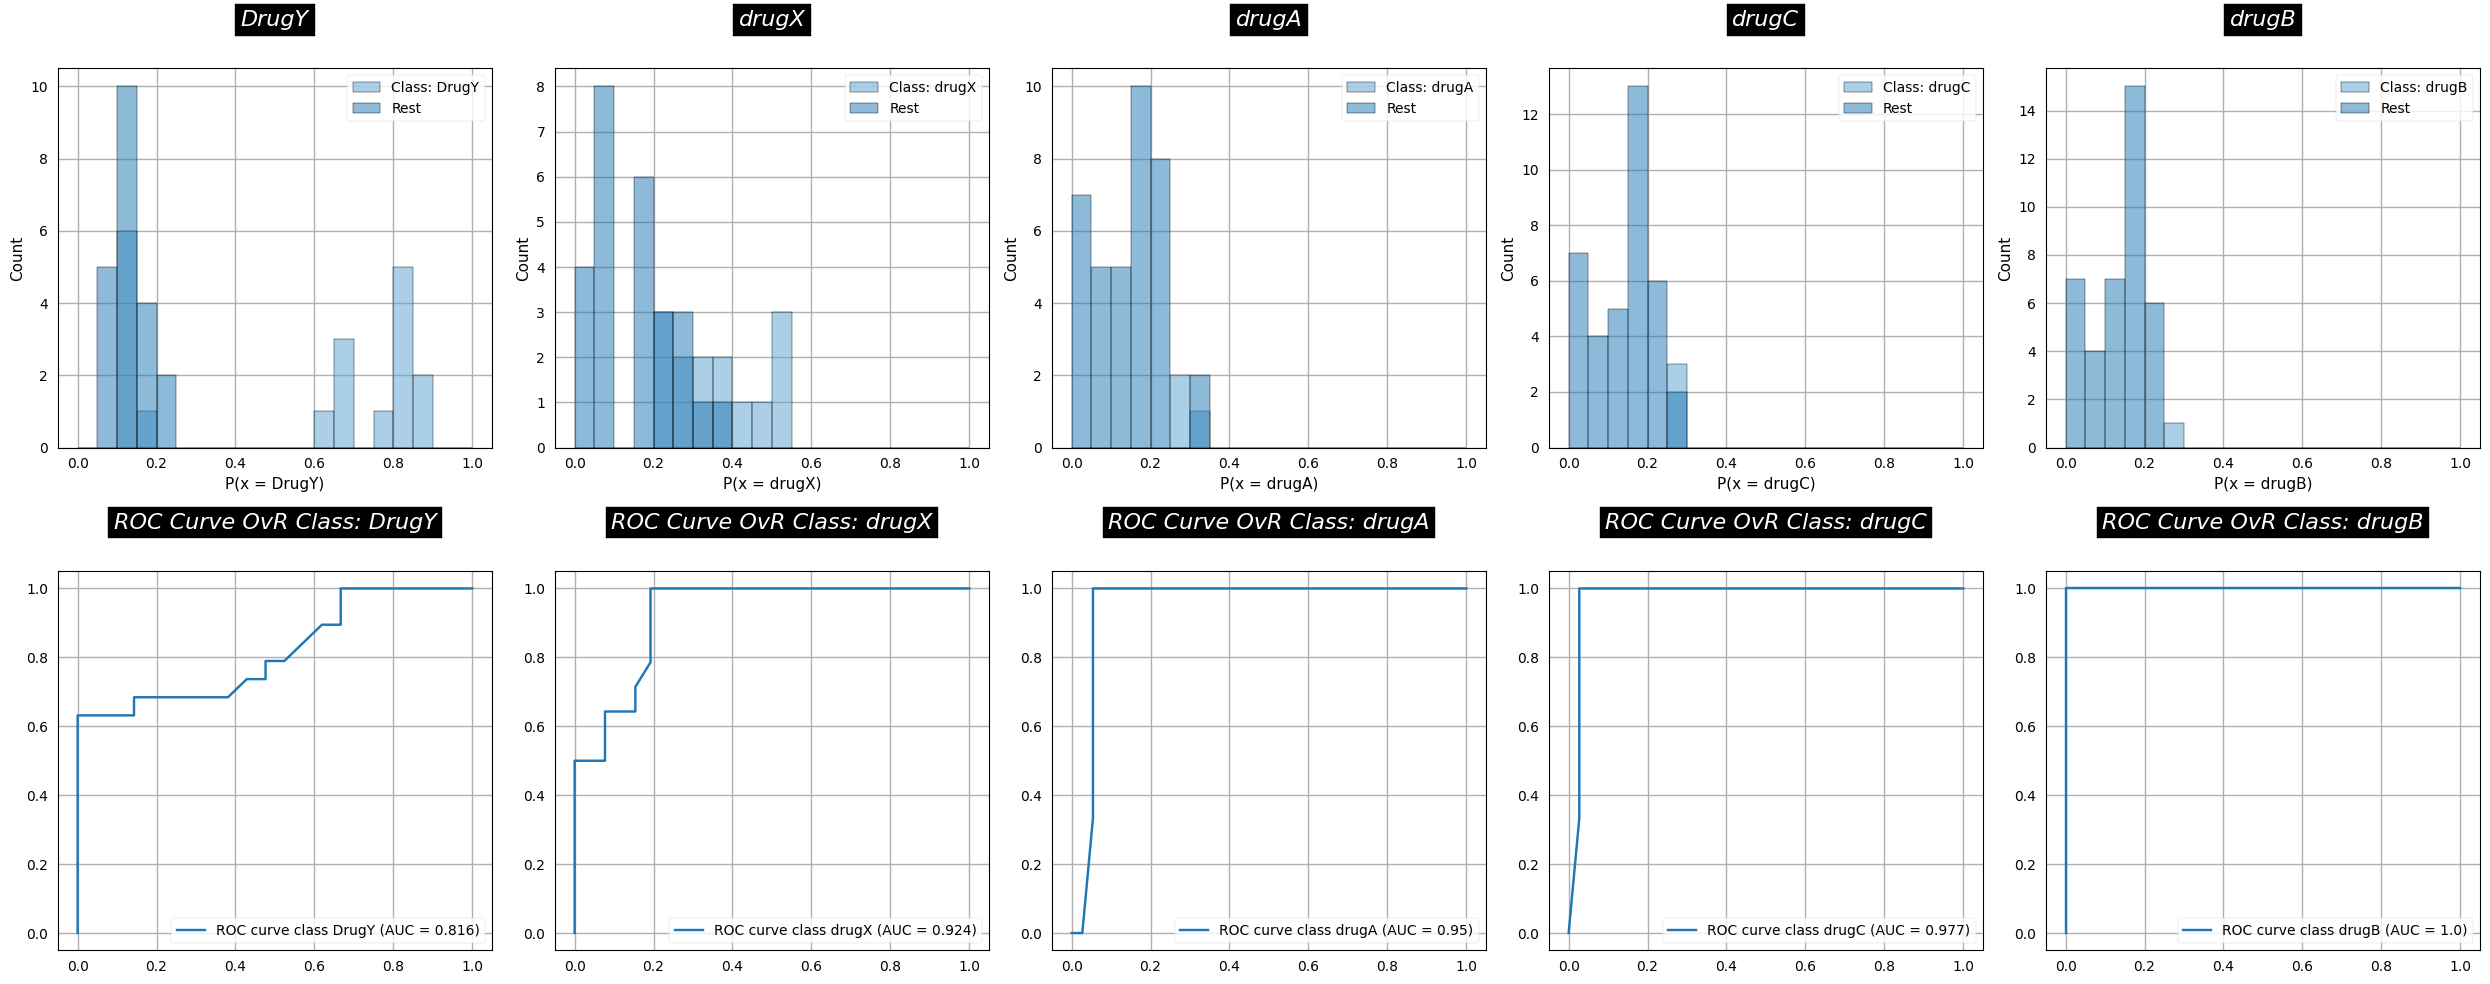

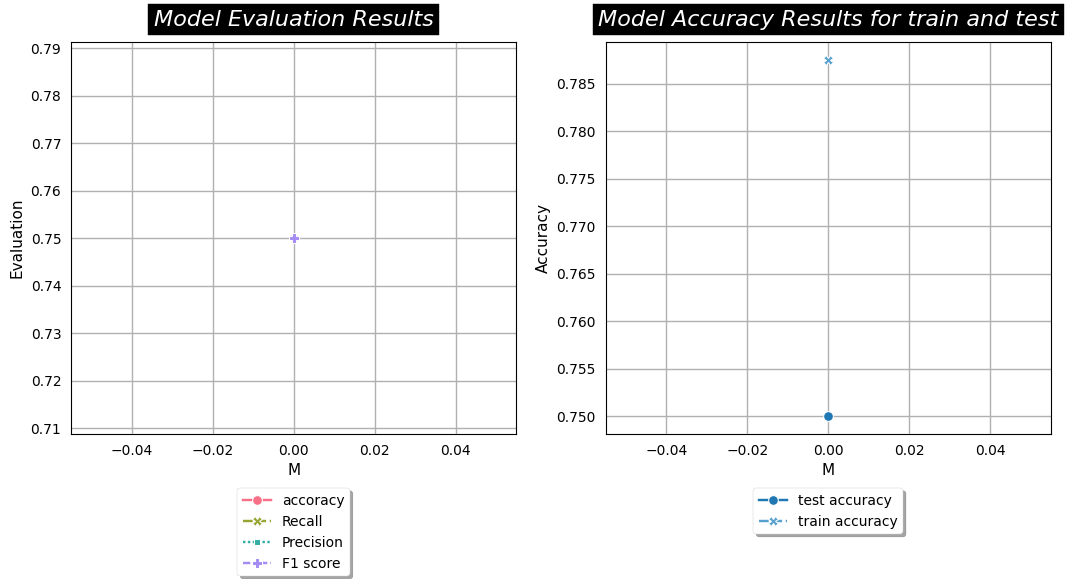

-------------------- Confusion Matrix --------------------
[[12  3  2  2  0]
 [ 0 13  0  1  0]
 [ 0  1  2  0  0]
 [ 0  1  0  2  0]
 [ 0  0  0  0  1]]


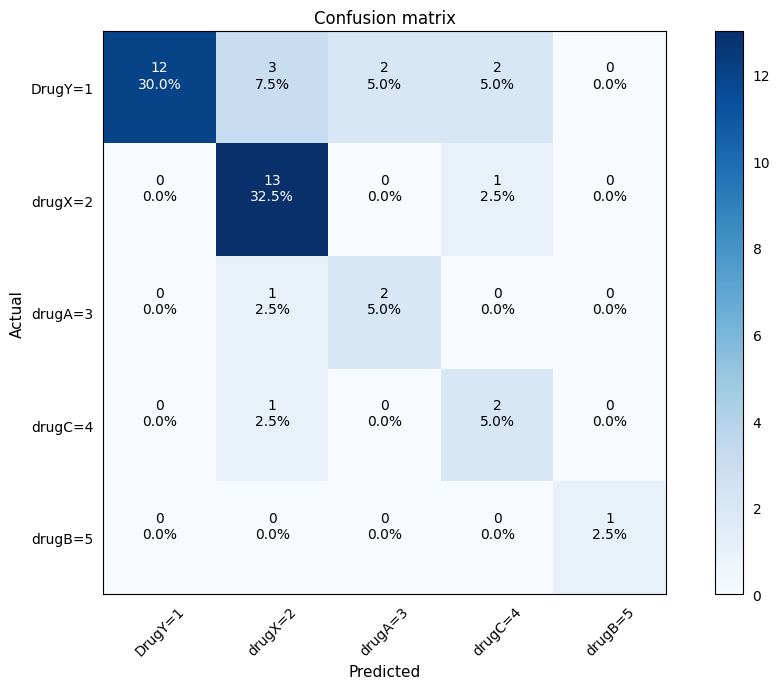

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           1       1.00      0.63      0.77        19
           2       0.72      0.93      0.81        14
           3       0.50      0.67      0.57         3
           4       0.40      0.67      0.50         3
           5       1.00      1.00      1.00         1

    accuracy                           0.75        40
   macro avg       0.72      0.78      0.73        40
weighted avg       0.82      0.75      0.76        40
 

Jaccard Score: 0.6 



In [42]:
%matplotlib inline
clf2 = ComplementNB()
classes = {i+1:j for i,j in enumerate(df.Drug_Type.value_counts().index)}
columns= df4.drop('Drug_Type', axis=1).columns.tolist()
acc_test2, acc_train2, _ = modeling(clf2, x, y, 0.2, classes, columns)

In [43]:
test_sizes= [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
acc_table = pd.DataFrame(columns=['Model', 'test_size', 'ACC_train', 'ACC_test'])
for i, test_size in enumerate(test_sizes):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    clf = ComplementNB()
    clf.fit(x_train, y_train.ravel())
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    acc_test_i = metrics.accuracy_score(y_test, y_pred_test)
    acc_train_i = metrics.accuracy_score(y_train, y_pred_train)
    acc_table.loc[len(acc_table.index)] = [f"Model 2_{i}", str(test_size), acc_train_i, acc_test_i]
acc_table.sort_values(by=['ACC_test'], ascending=False).style.background_gradient(cmap='summer_r')

-------------------- Shape --------------------
x_train: (130, 18)
y_train: (130, 1)
x_test: (70, 18)
y_test: (70, 1)


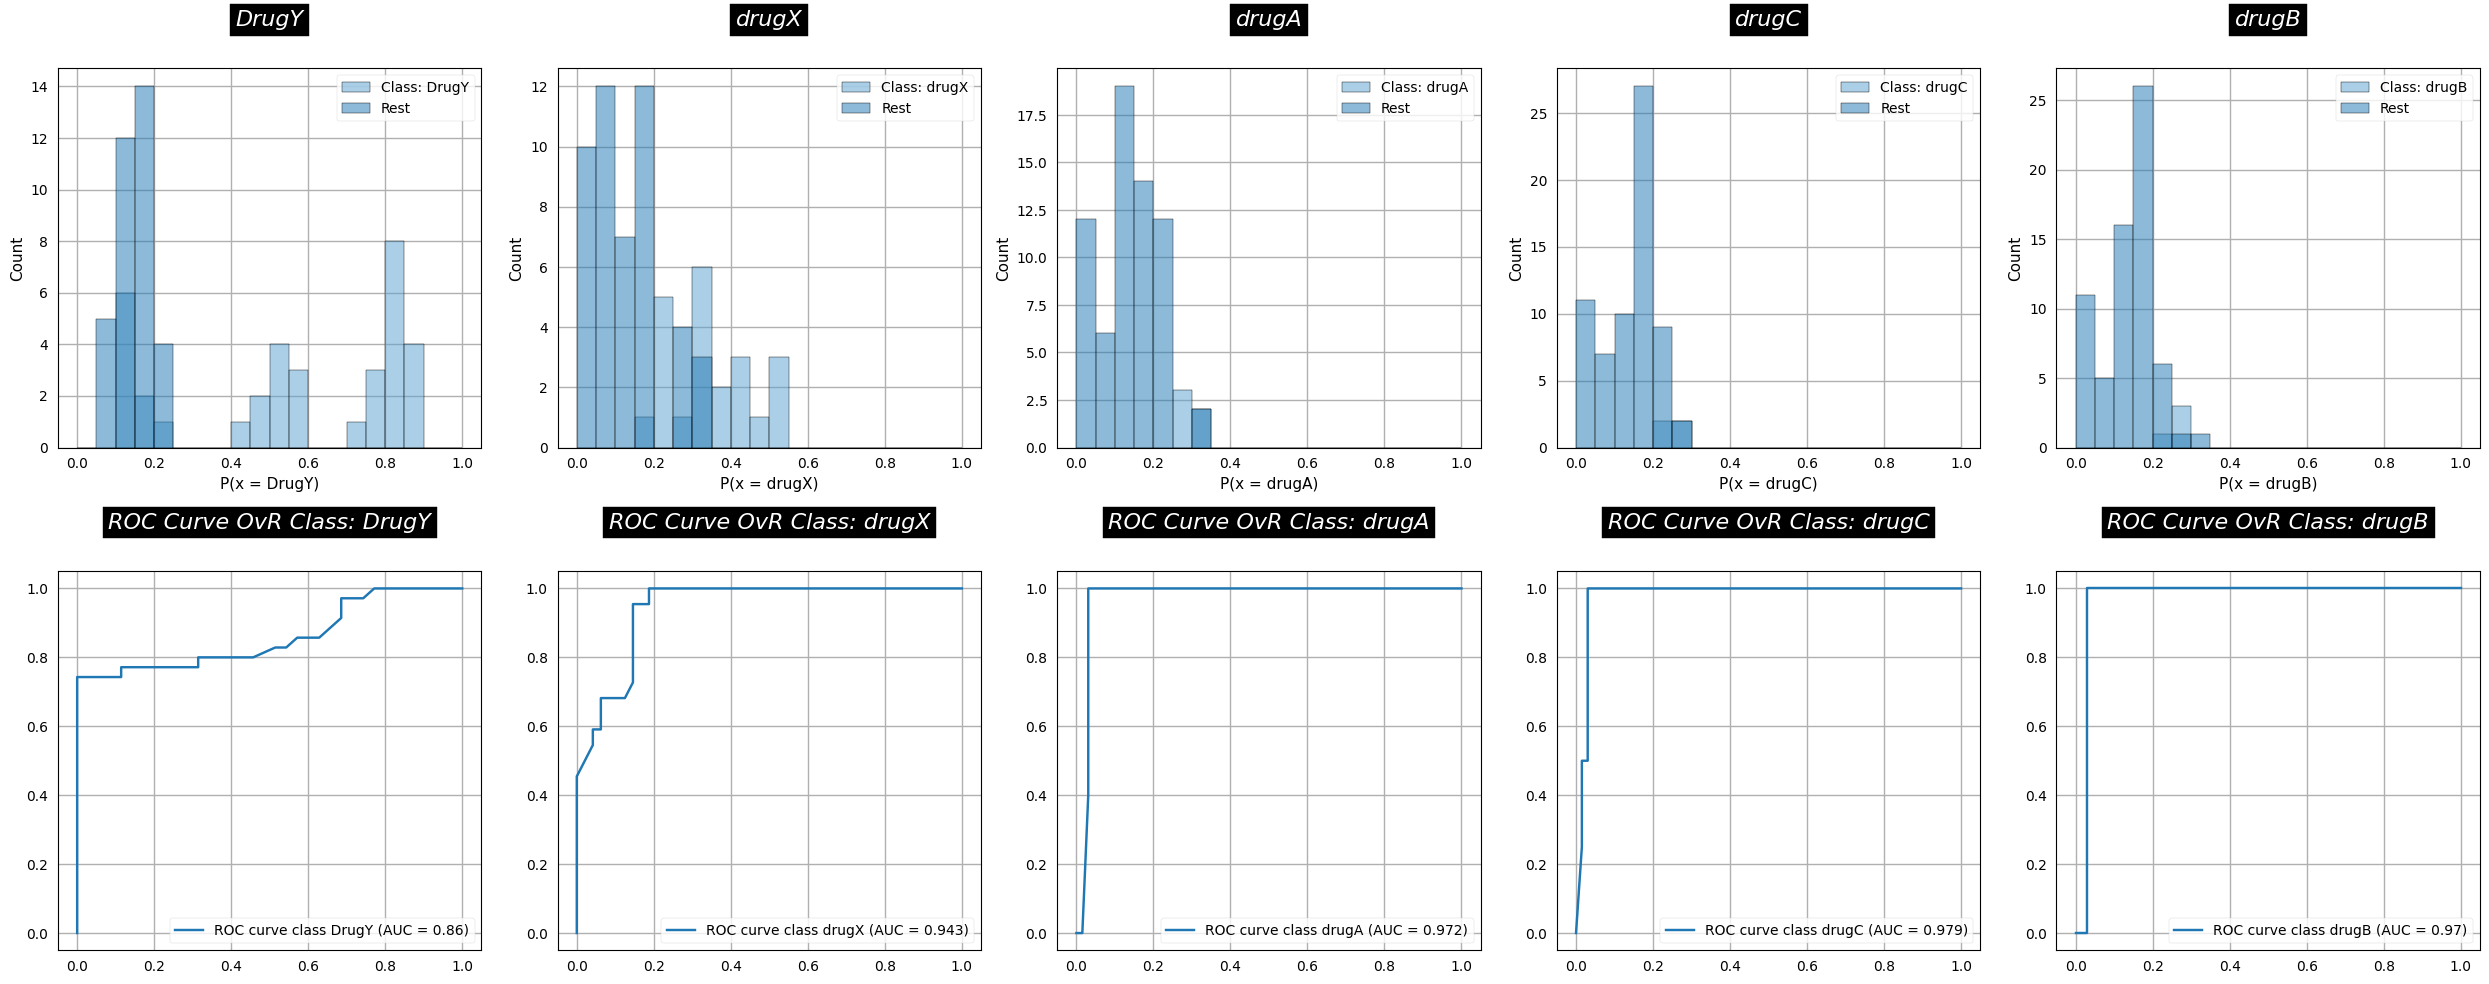

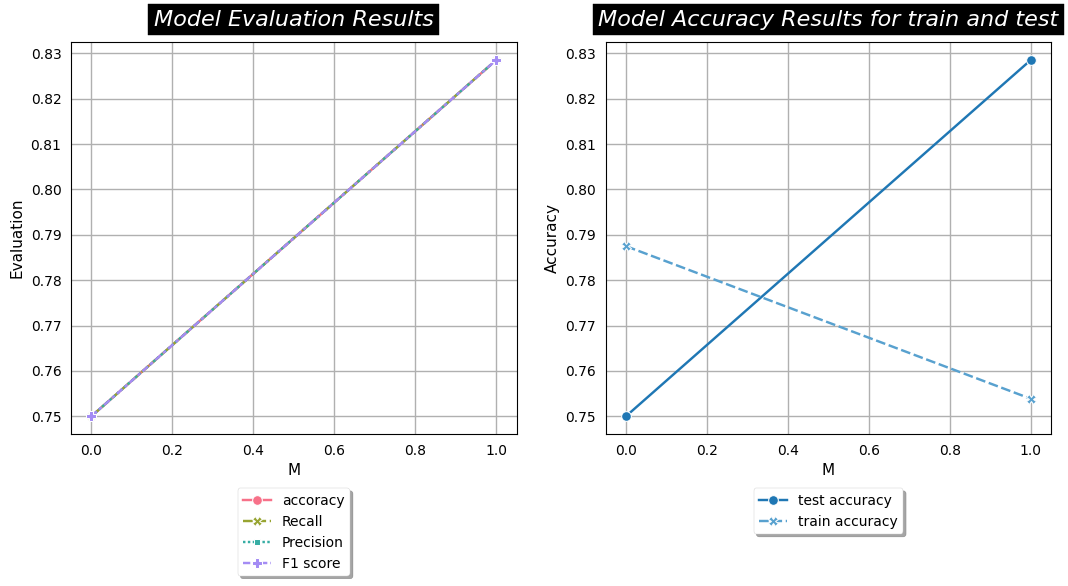

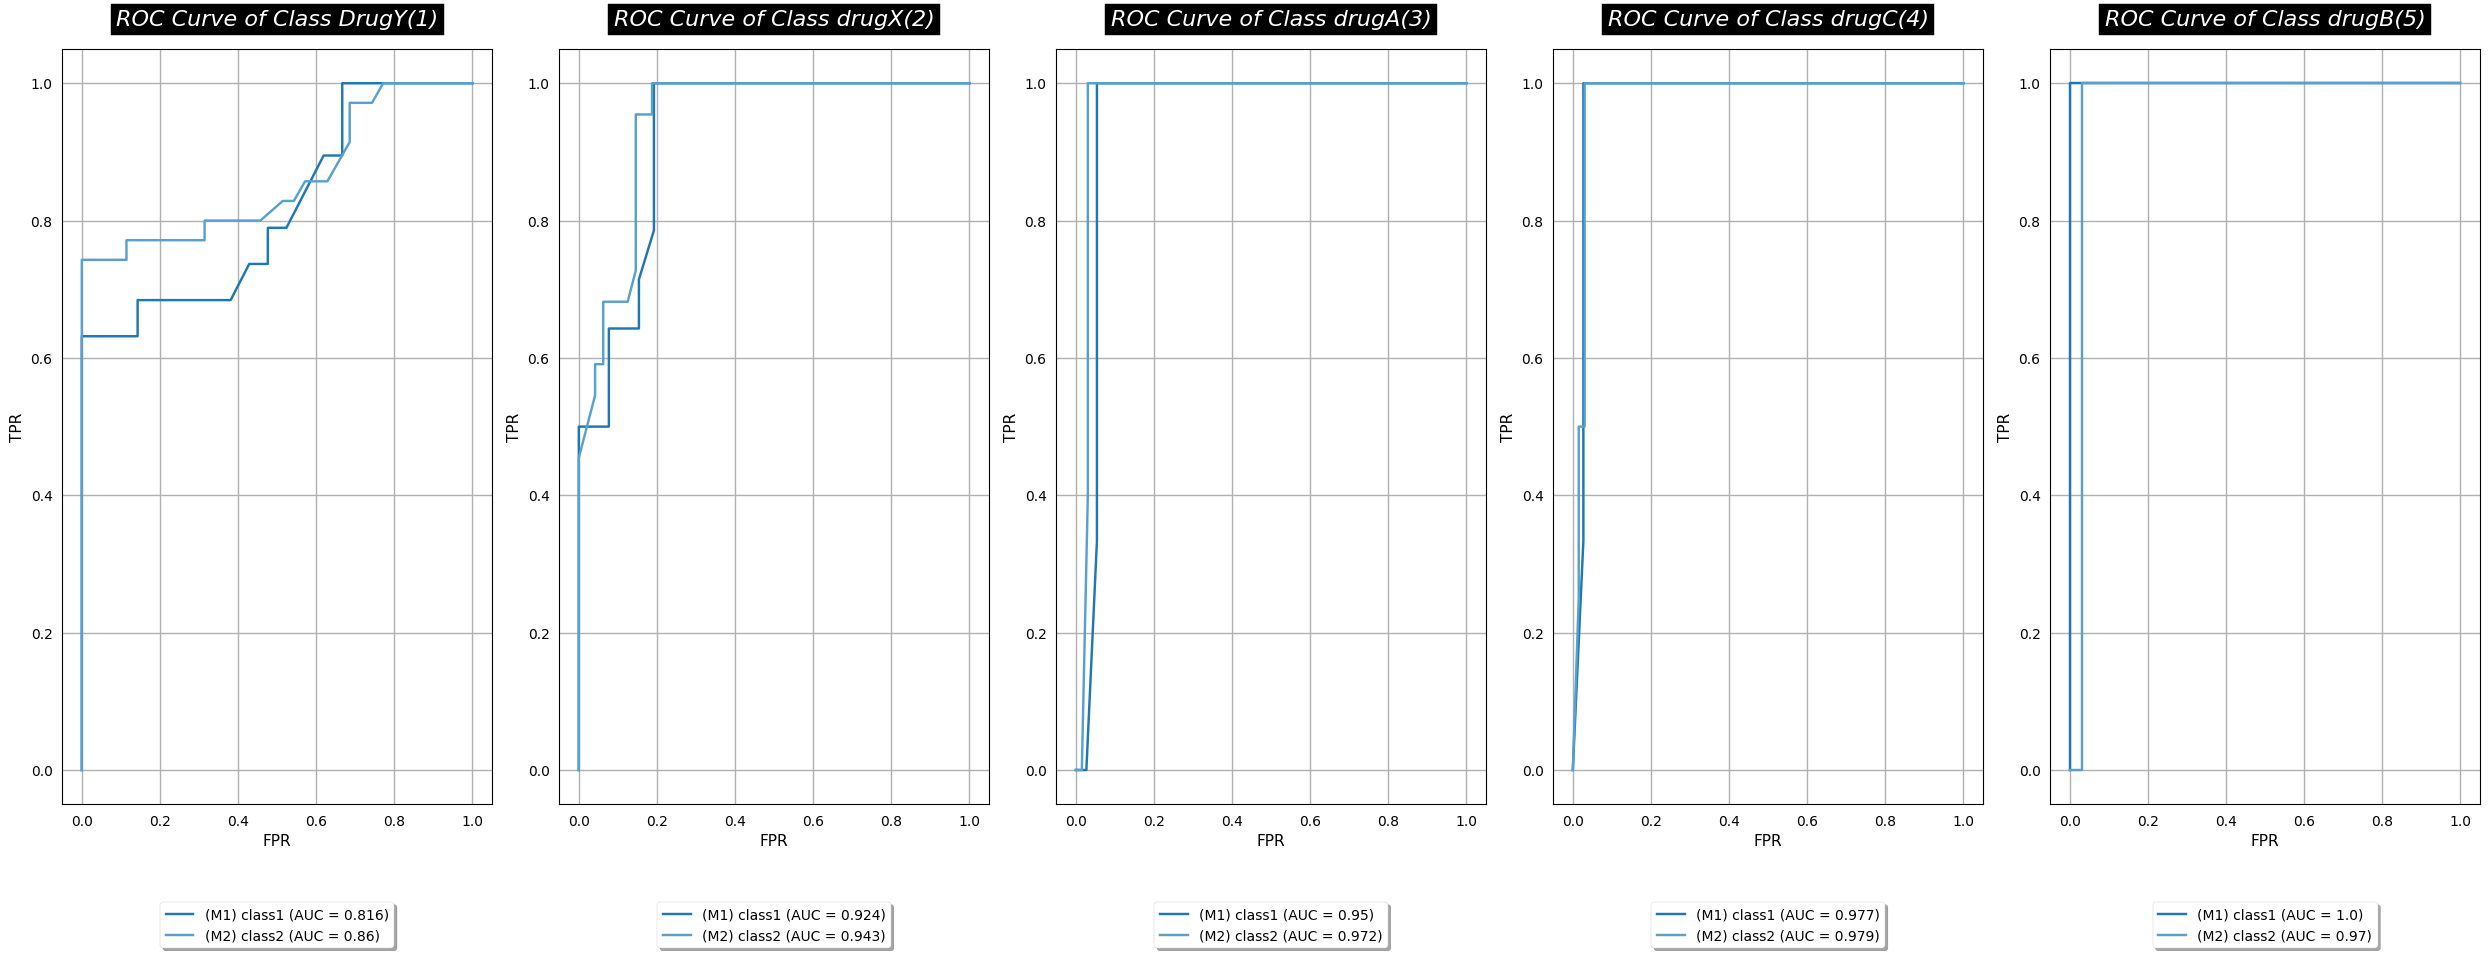

-------------------- Confusion Matrix --------------------
[[26  4  2  2  1]
 [ 0 21  0  0  1]
 [ 0  0  5  0  0]
 [ 0  2  0  2  0]
 [ 0  0  0  0  4]]


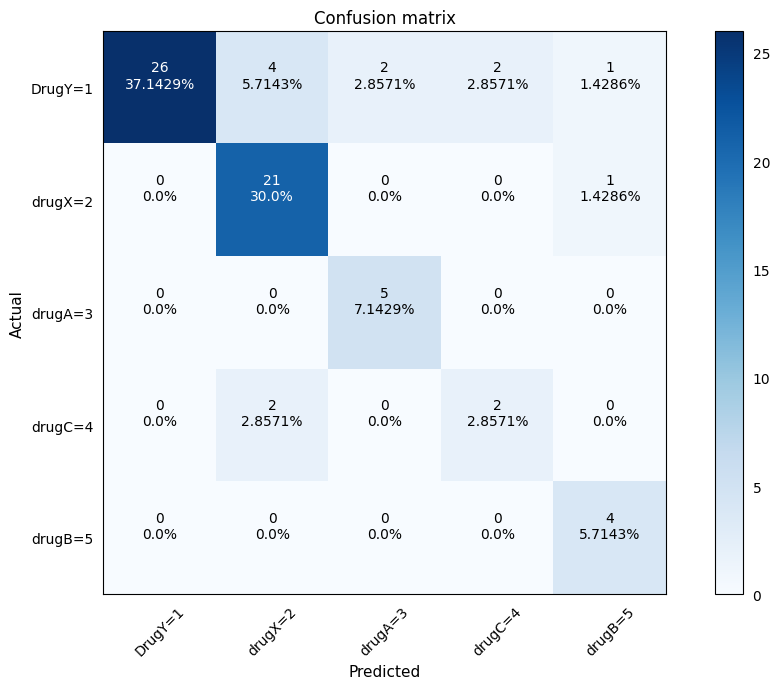

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           1       1.00      0.74      0.85        35
           2       0.78      0.95      0.86        22
           3       0.71      1.00      0.83         5
           4       0.50      0.50      0.50         4
           5       0.67      1.00      0.80         4

    accuracy                           0.83        70
   macro avg       0.73      0.84      0.77        70
weighted avg       0.86      0.83      0.83        70
 

Jaccard Score: 0.7073170731707317 



In [44]:
%matplotlib inline
clf2 = ComplementNB()
classes = {i+1:j for i,j in enumerate(df.Drug_Type.value_counts().index)}
columns= df4.drop('Drug_Type', axis=1).columns.tolist()
acc_test2_2, acc_train2_2, _ = modeling(clf2, x, y, 0.35, classes, columns)

In [45]:
clf = ComplementNB()
Perform_cross_val(clf, 10, x, y, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.74
CV results: [0.7  0.8  0.85 0.9  0.7  0.85 0.65 0.65 0.65 0.65]



In [46]:
best_model_test.loc[len(best_model_test.index)] = [f"Complement NB", '0.35', acc_test2_2]
best_model_train.loc[len(best_model_train.index)] = [f"Complement NB", '0.35', acc_train2_2]

In [47]:
delete_results()

-------------------- Shape --------------------
x_train: (160, 18)
y_train: (160, 1)
x_test: (40, 18)
y_test: (40, 1)


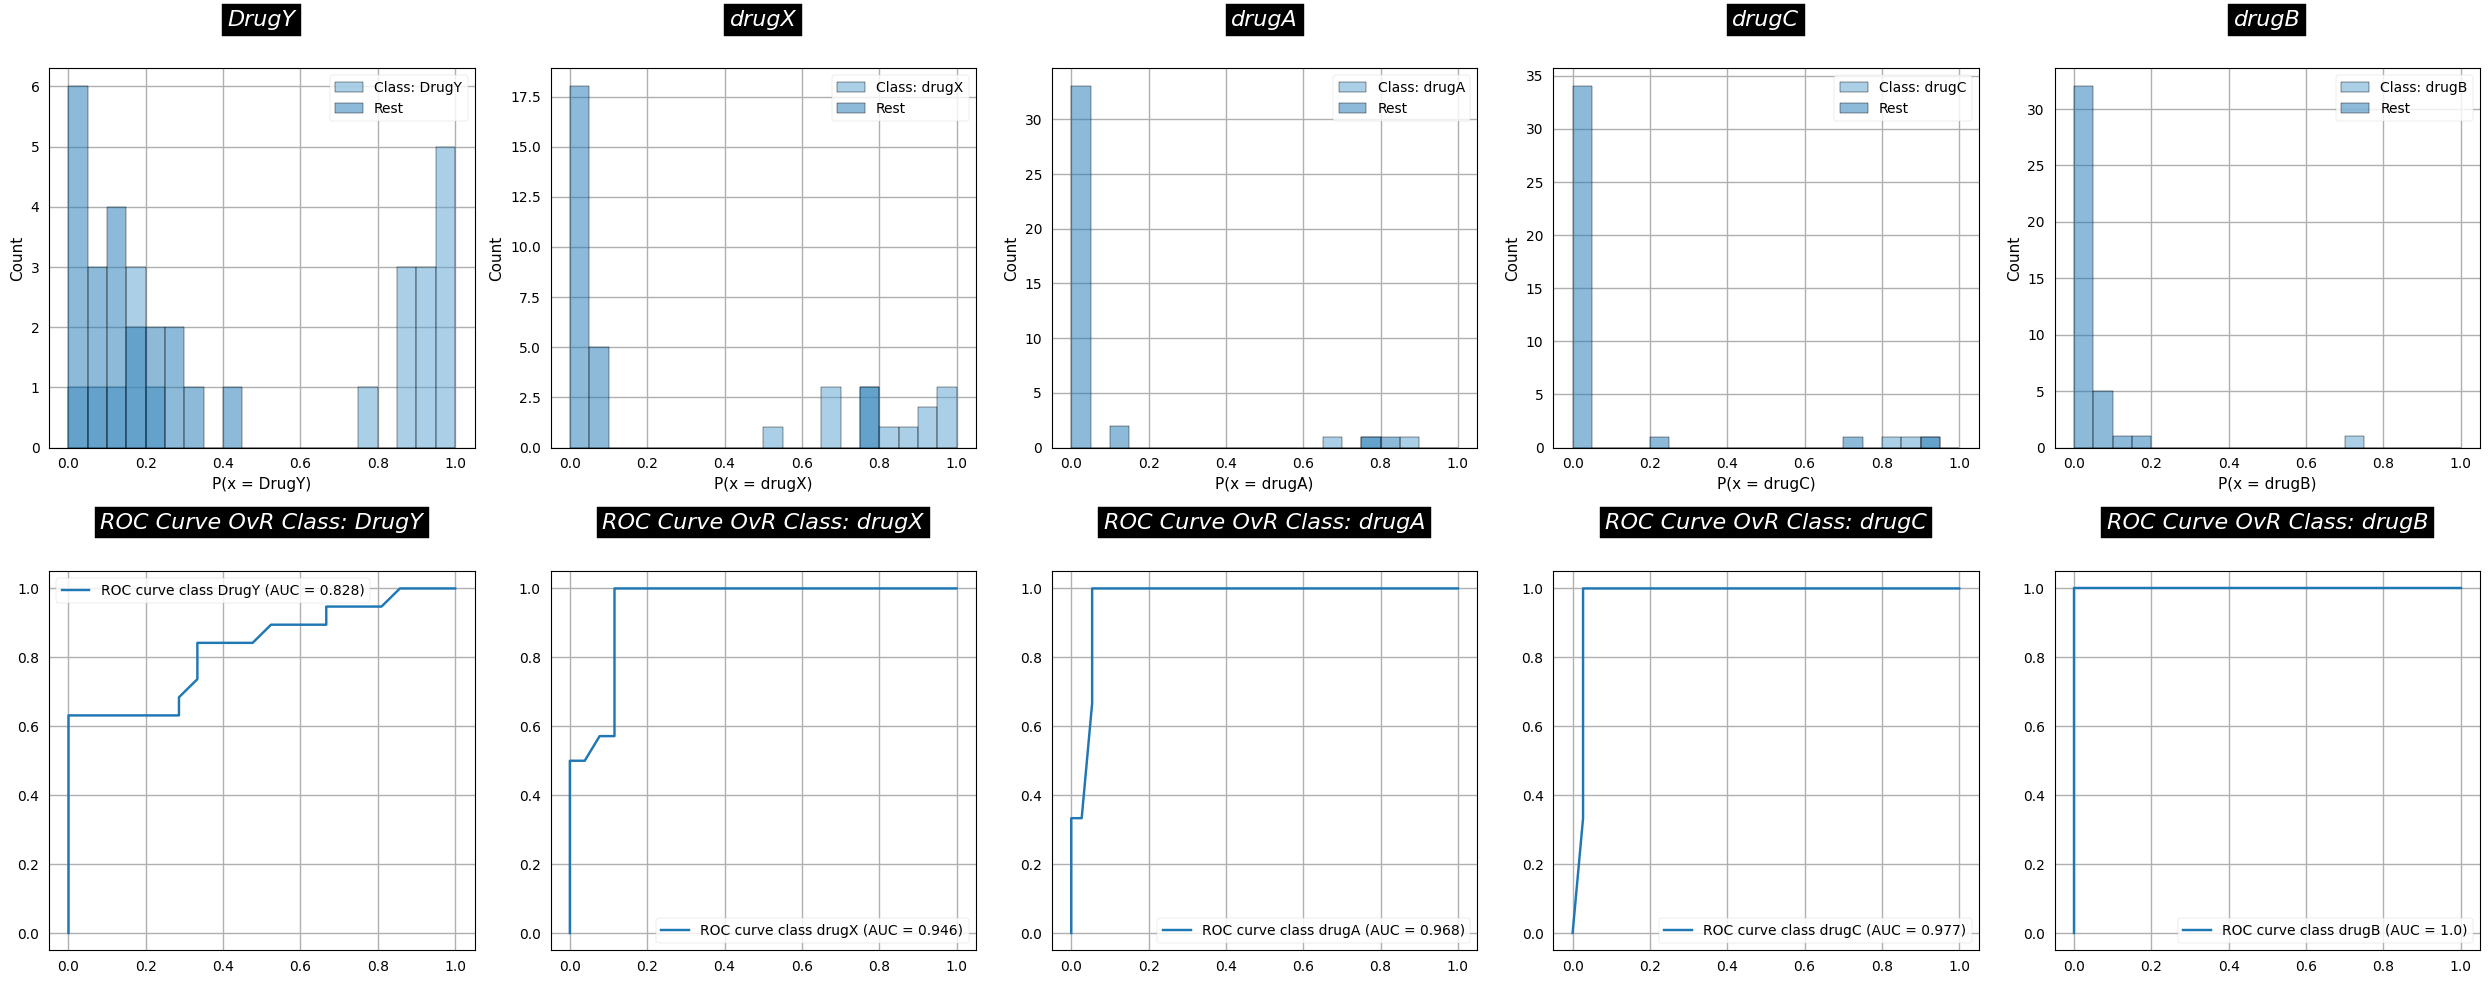

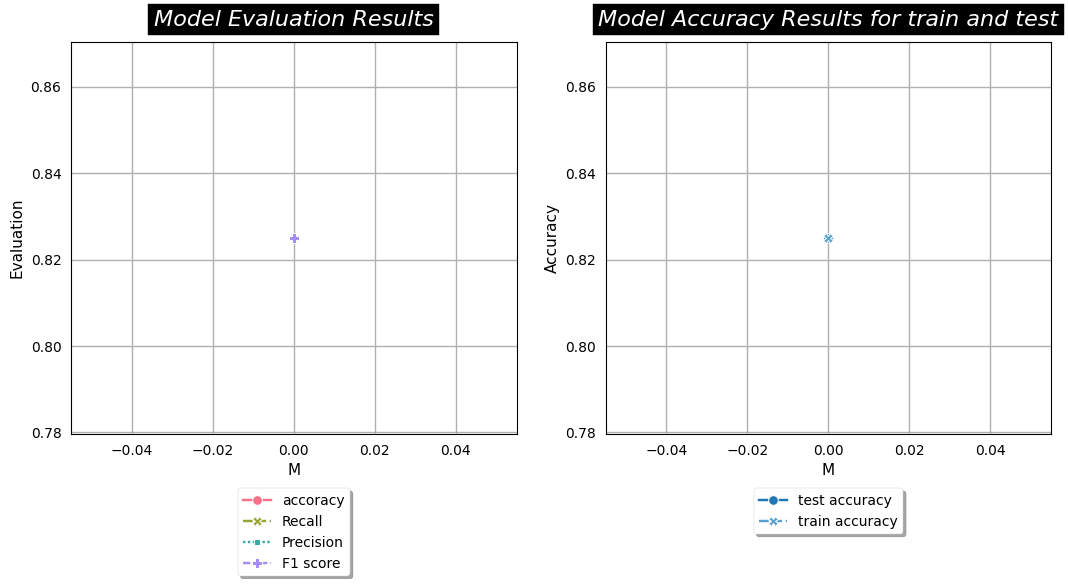

-------------------- Confusion Matrix --------------------
[[12  3  2  2  0]
 [ 0 14  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  1]]


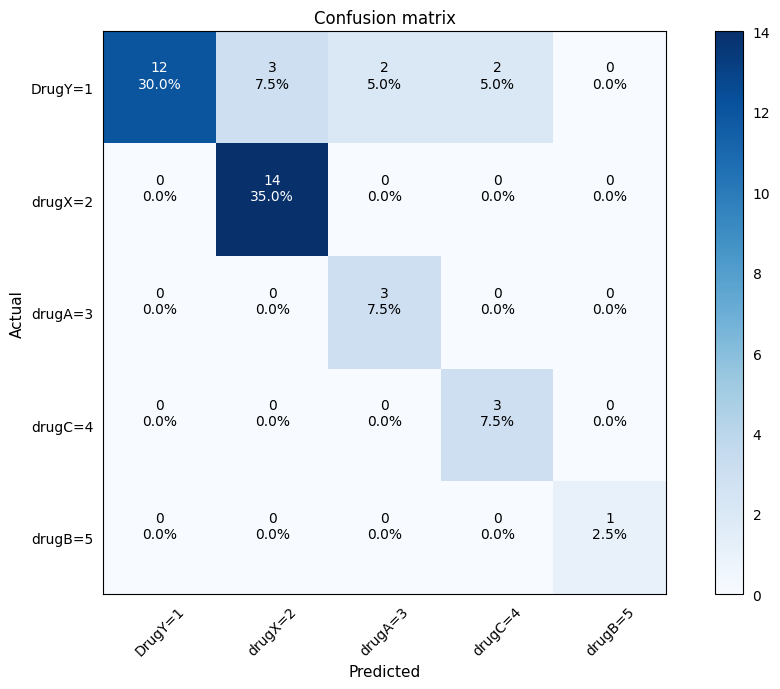

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           1       1.00      0.63      0.77        19
           2       0.82      1.00      0.90        14
           3       0.60      1.00      0.75         3
           4       0.60      1.00      0.75         3
           5       1.00      1.00      1.00         1

    accuracy                           0.82        40
   macro avg       0.80      0.93      0.84        40
weighted avg       0.88      0.82      0.82        40
 

Jaccard Score: 0.7021276595744681 



In [48]:
%matplotlib inline
clf = BernoulliNB()
classes = {i+1:j for i,j in enumerate(df.Drug_Type.value_counts().index)}
columns= df4.drop('Drug_Type', axis=1).columns.tolist()
acc_test3, acc_train3, _ = modeling(clf, x, y, 0.2, classes, columns)

In [49]:
test_sizes= [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
acc_table = pd.DataFrame(columns=['Model', 'test_size', 'ACC_train', 'ACC_test'])
for i, test_size in enumerate(test_sizes):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    clf = BernoulliNB()
    clf.fit(x_train, y_train.ravel())
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    acc_test_i = metrics.accuracy_score(y_test, y_pred_test)
    acc_train_i = metrics.accuracy_score(y_train, y_pred_train)
    acc_table.loc[len(acc_table.index)] = [f"Model 3_{i}", str(test_size), acc_train_i, acc_test_i]
acc_table.sort_values(by=['ACC_test'], ascending=False).style.background_gradient(cmap='summer_r')

In [50]:
clf = BernoulliNB()
Perform_cross_val(clf, 10, x, y, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.805
CV results: [0.75 0.85 0.8  0.9  0.7  0.85 0.8  0.85 0.7  0.85]



In [51]:
best_model_test.loc[len(best_model_test.index)] = [f"Bernolli NB", '0.2', acc_test3]
best_model_train.loc[len(best_model_train.index)] = [f"Bernolli NB", '0.2', acc_train3]

In [52]:
delete_results()

-------------------- Shape --------------------
x_train: (160, 18)
y_train: (160, 1)
x_test: (40, 18)
y_test: (40, 1)


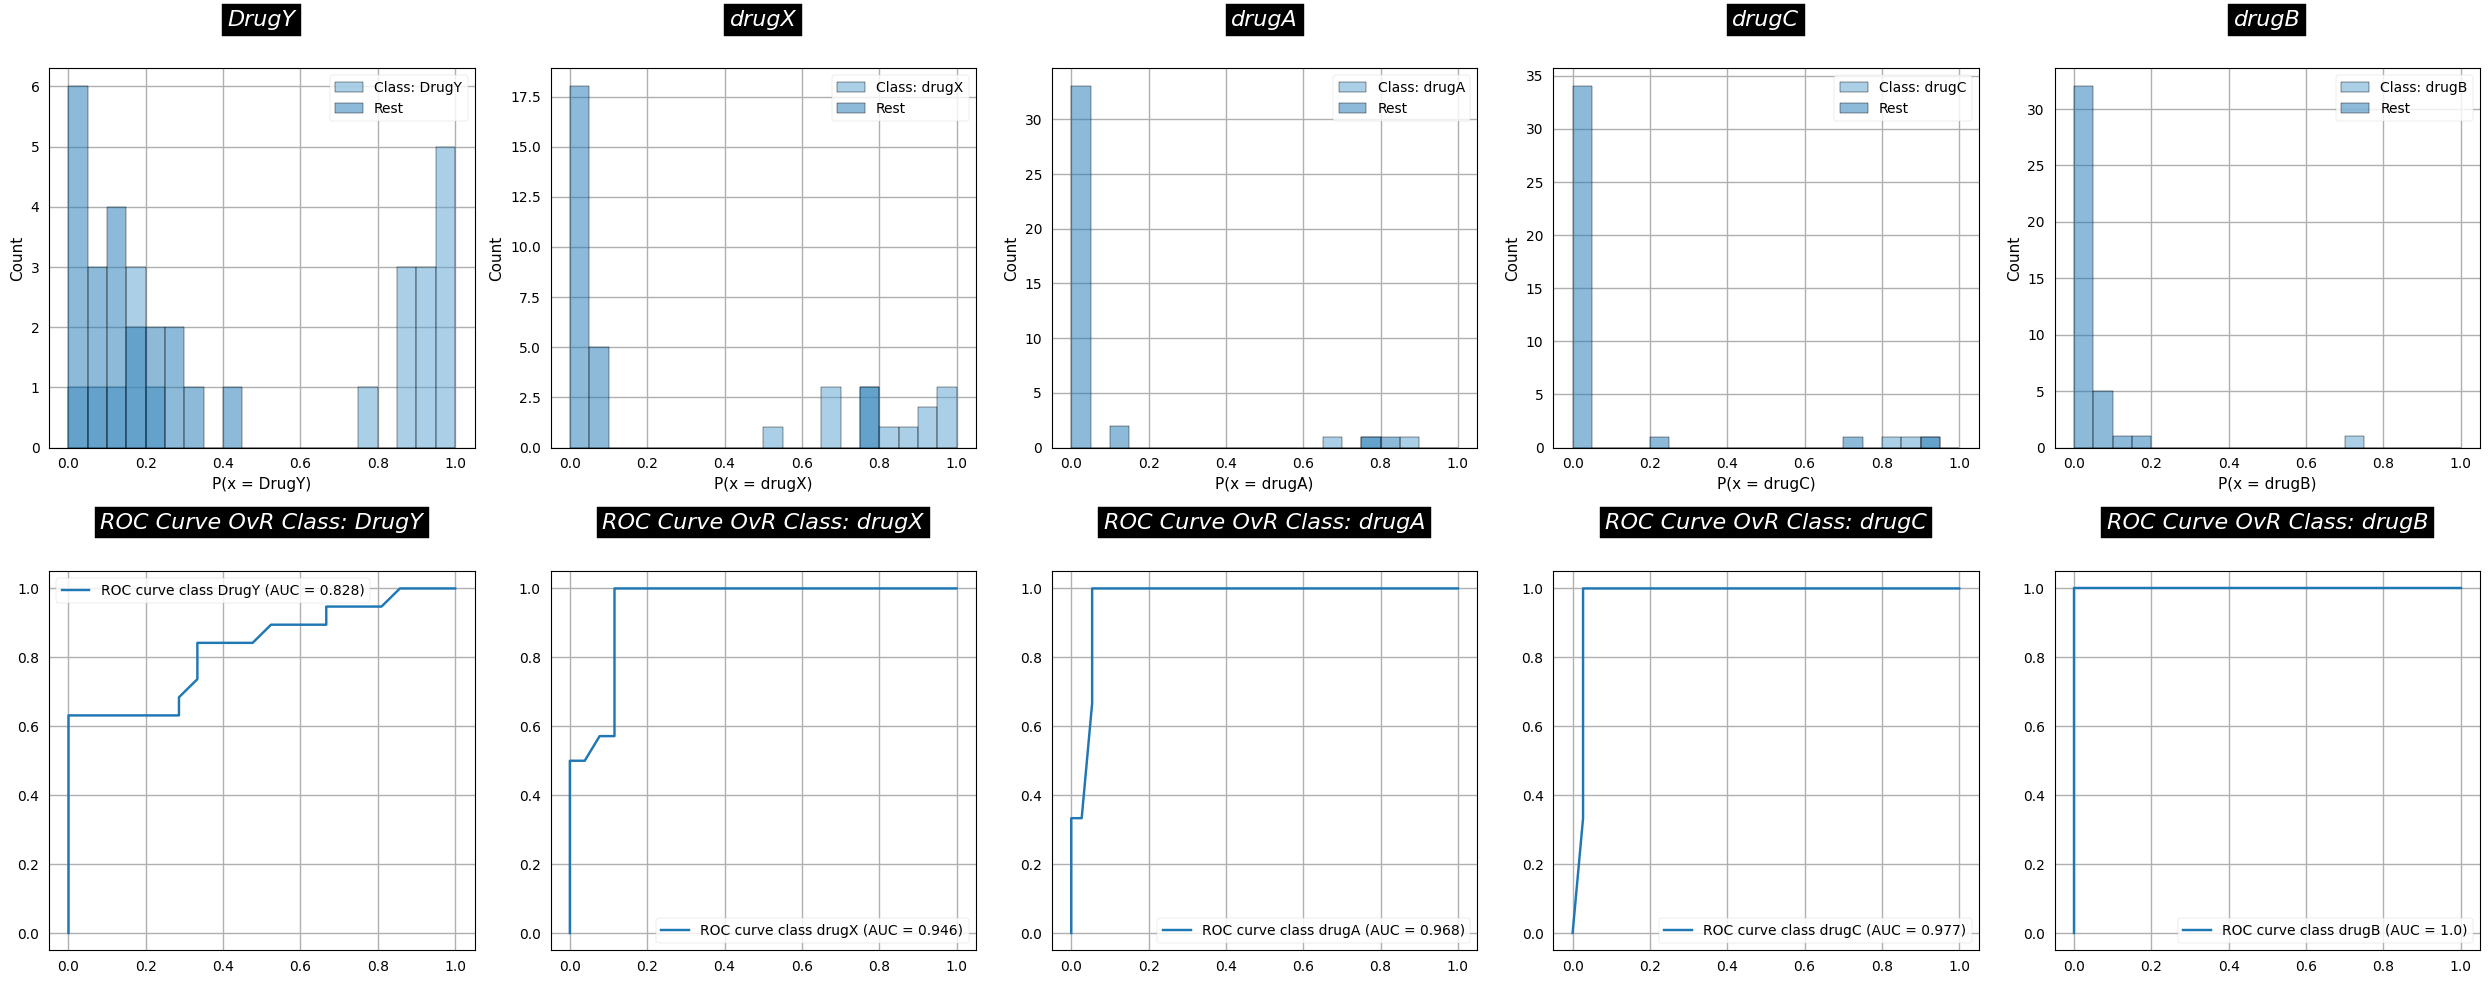

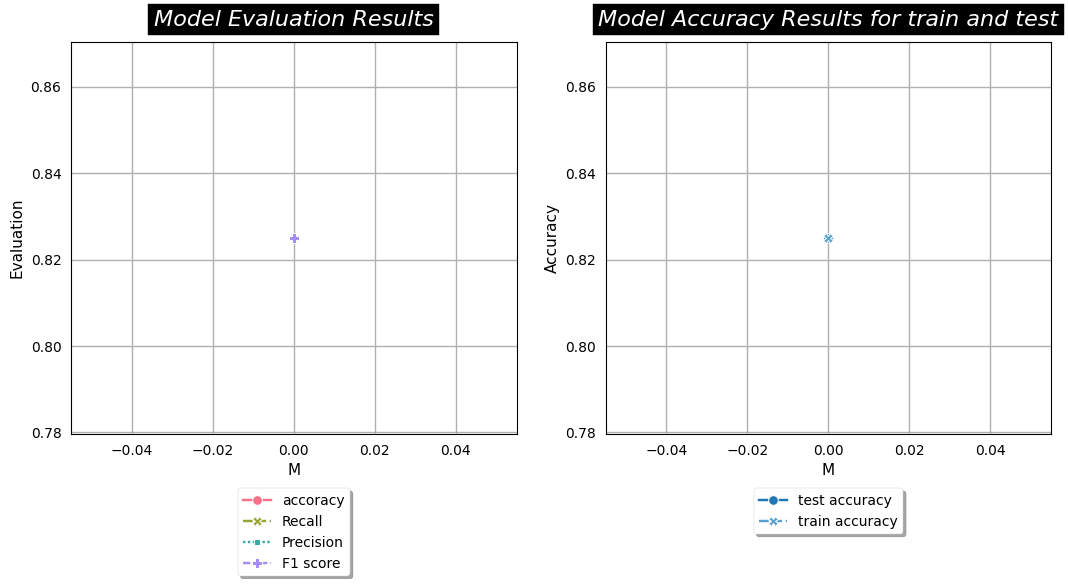

-------------------- Confusion Matrix --------------------
[[12  3  2  2  0]
 [ 0 14  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  1]]


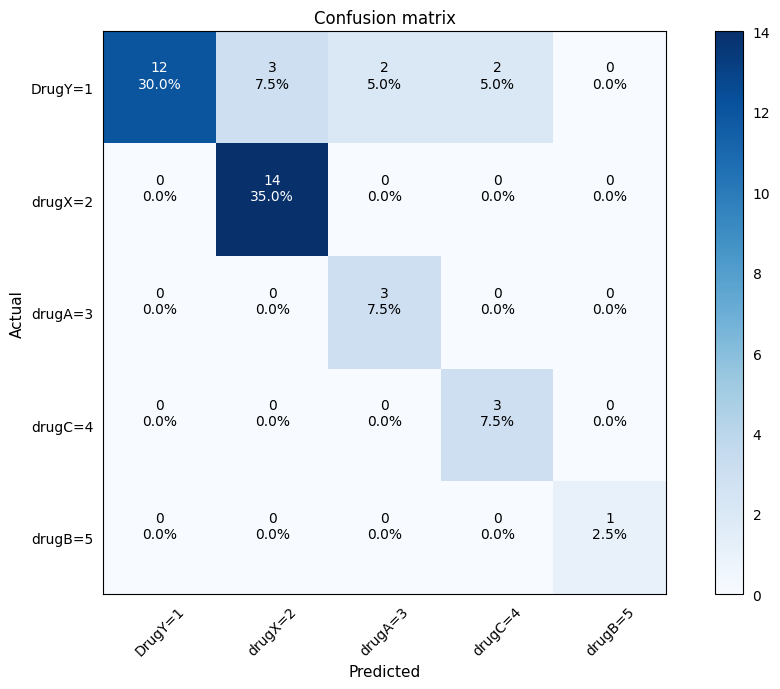

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           1       1.00      0.63      0.77        19
           2       0.82      1.00      0.90        14
           3       0.60      1.00      0.75         3
           4       0.60      1.00      0.75         3
           5       1.00      1.00      1.00         1

    accuracy                           0.82        40
   macro avg       0.80      0.93      0.84        40
weighted avg       0.88      0.82      0.82        40
 

Jaccard Score: 0.7021276595744681 



In [53]:
%matplotlib inline
clf = CategoricalNB()
classes = {i+1:j for i,j in enumerate(df.Drug_Type.value_counts().index)}
columns= df4.drop('Drug_Type', axis=1).columns.tolist()
acc_test4, acc_train4, _ = modeling(clf, x, y, 0.2, classes, columns)

In [54]:
test_sizes= [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
acc_table = pd.DataFrame(columns=['Model', 'test_size', 'ACC_train', 'ACC_test'])
for i, test_size in enumerate(test_sizes):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    clf = CategoricalNB()
    clf.fit(x_train, y_train.ravel())
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    acc_test_i = metrics.accuracy_score(y_test, y_pred_test)
    acc_train_i = metrics.accuracy_score(y_train, y_pred_train)
    acc_table.loc[len(acc_table.index)] = [f"Model 4_{i}", str(test_size), acc_train_i, acc_test_i]
acc_table.sort_values(by=['ACC_test'], ascending=False).style.background_gradient(cmap='summer_r')

In [56]:
clf = CategoricalNB()
Perform_cross_val(clf, 10, x, y, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.805
CV results: [0.75 0.85 0.8  0.9  0.7  0.85 0.8  0.85 0.7  0.85]



In [57]:
best_model_test.loc[len(best_model_test.index)] = [f"Categorical NB", '0.2', acc_test4]
best_model_train.loc[len(best_model_train.index)] = [f"Categorical NB", '0.2', acc_train4]

In [58]:
delete_results()

In [59]:
df5 = df4.copy()
df5.iloc[:, :-1] = df5.iloc[:, :-1].replace([0,1], [2,3])
df5

Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  Cholesterol_HIGH  \
0     True  False     True   False      False              True   
1    False   True    False    True      False              True   
2    False   True    False    True      False              True   
3     True  False    False   False       True              True   
4     True  False    False    True      False              True   
..     ...    ...      ...     ...        ...               ...   
195   True  False    False    True      False              True   
196  False   True    False    True      False              True   
197  False   True    False   False       True              True   
198  False   True    False   False       True             False   
199   True  False    False    True      False             False   

     Cholesterol_NORMAL  Age_binned_<20s  Age_binned_20s  Age_binned_30s  \
0                 False            False            True           False   
1                 False            False           False           False   
2                 False            False           False           False   
3                 False            False            True           False   
4                 False            False           False           False   
..                  ...              ...             ...             ...   
195               False            False           False           False   
196               False             True           False           False   
197               False            False           False           False   
198                True            False            True           False   
199                True            False           False           False   

     Age_binned_40s  Age_binned_50s  Age_binned_60s  Age_binned_>60s  \
0             False           False           False            False   
1              True           False           False            False   
2              True           False           False            False   
3             False           False           False            False   
4             False           False            True            False   
..              ...             ...             ...              ...   
195           False            True           False            False   
196           False           False           False            False   
197           False            True           False            False   
198           False           False           False            False   
199            True           False           False            False   

     Na_to_K_binned_<10  Na_to_K_binned_10-20  Na_to_K_binned_20-30  \
0                 False                 False                  True   
1                 False                  True                 False   
2                 False                  True                 False   
3                  True                 False                 False   
4                 False                  True                 False   
..                  ...                   ...                   ...   
195               False                  True                 False   
196               False                  True                 False   
197               False                  True                 False   
198               False                  True                 False   
199               False                  True                 False   

     Na_to_K_binned_>30  Drug_Type  
0                 False          1  
1                 False          4  
2                 False          4  
3                 False          2  
4                 False          1  
..                  ...        ...  
195               False          4  
196               False          4  
197               False          2  
198               False          2  
199               False          2  

[200 rows x 19 columns]

In [60]:
x2 = np.asanyarray(df5.drop('Drug_Type', axis=1))
y2 = df5.Drug_Type.values.reshape(-1,1)

-------------------- Shape --------------------
x_train: (160, 18)
y_train: (160, 1)
x_test: (40, 18)
y_test: (40, 1)


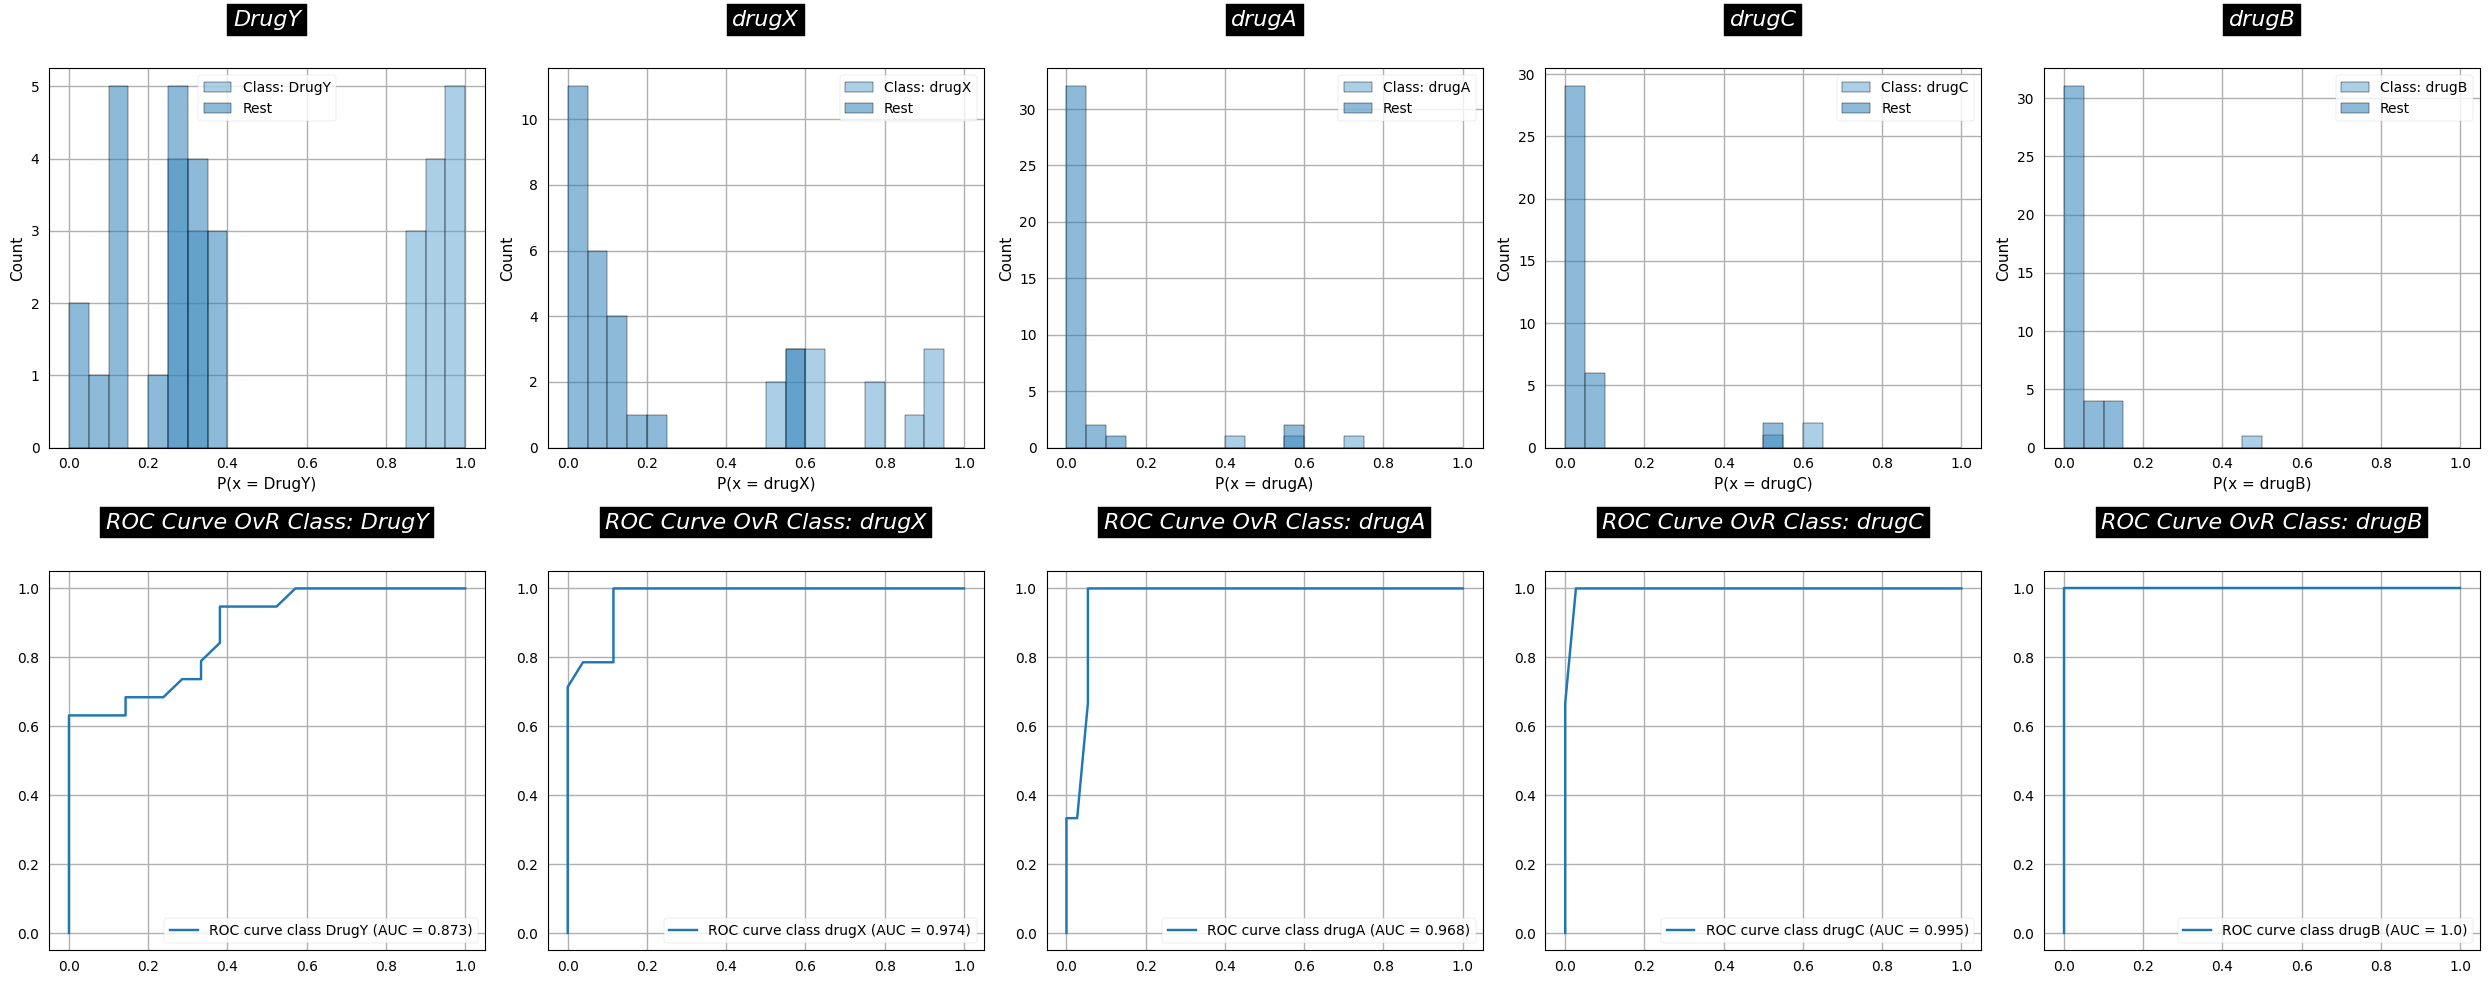

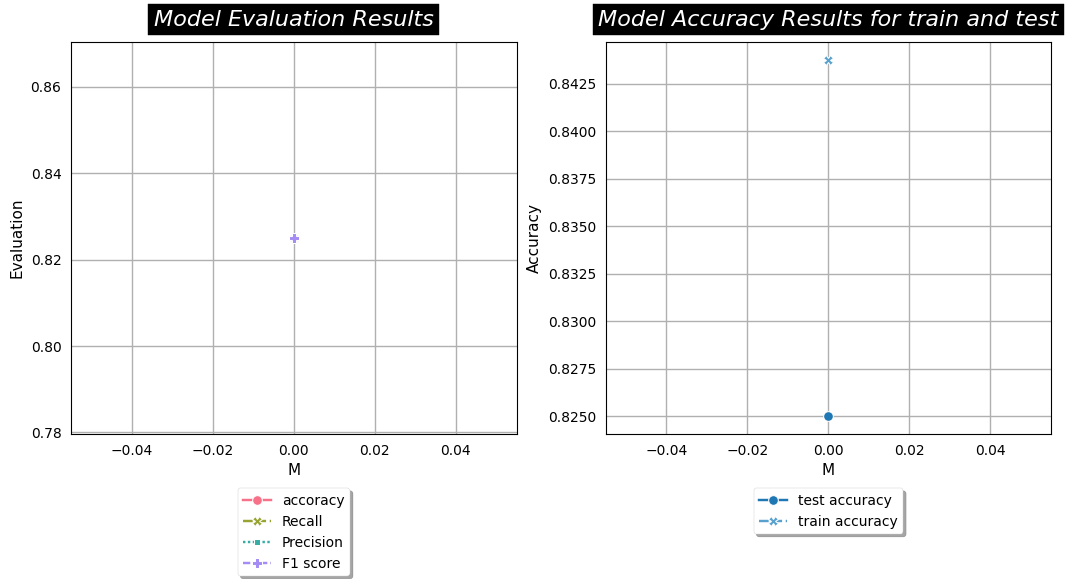

-------------------- Confusion Matrix --------------------
[[12  3  2  2  0]
 [ 0 14  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  1]]


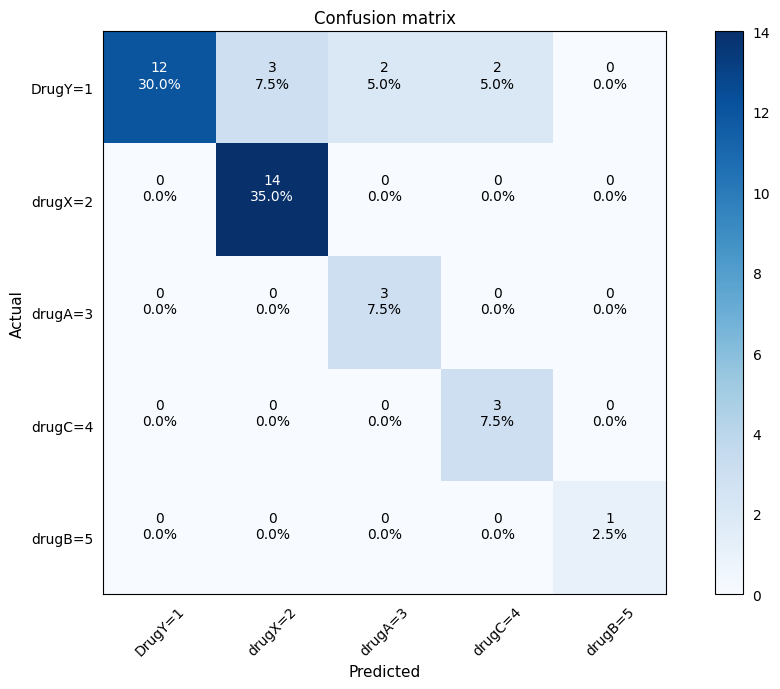

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           1       1.00      0.63      0.77        19
           2       0.82      1.00      0.90        14
           3       0.60      1.00      0.75         3
           4       0.60      1.00      0.75         3
           5       1.00      1.00      1.00         1

    accuracy                           0.82        40
   macro avg       0.80      0.93      0.84        40
weighted avg       0.88      0.82      0.82        40
 

Jaccard Score: 0.7021276595744681 



In [61]:
%matplotlib inline
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
classes = {i+1:j for i,j in enumerate(df.Drug_Type.value_counts().index)}
columns= df5.drop('Drug_Type', axis=1).columns.tolist()
acc_test5, acc_train5, y_pred = modeling(clf, x2, y2, 0.2, classes, columns)

In [63]:
test_sizes= [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
acc_table = pd.DataFrame(columns=['Model', 'test_size', 'ACC_train', 'ACC_test'])
for i, test_size in enumerate(test_sizes):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
    clf.fit(x_train, y_train.ravel())
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    acc_test_i = metrics.accuracy_score(y_test, y_pred_test)
    acc_train_i = metrics.accuracy_score(y_train, y_pred_train)
    acc_table.loc[len(acc_table.index)] = [f"Model 5_{i}", str(test_size), acc_train_i, acc_test_i]
acc_table.sort_values(by=['ACC_test'], ascending=False).style.background_gradient(cmap='summer_r')

-------------------- Shape --------------------
x_train: (130, 18)
y_train: (130, 1)
x_test: (70, 18)
y_test: (70, 1)


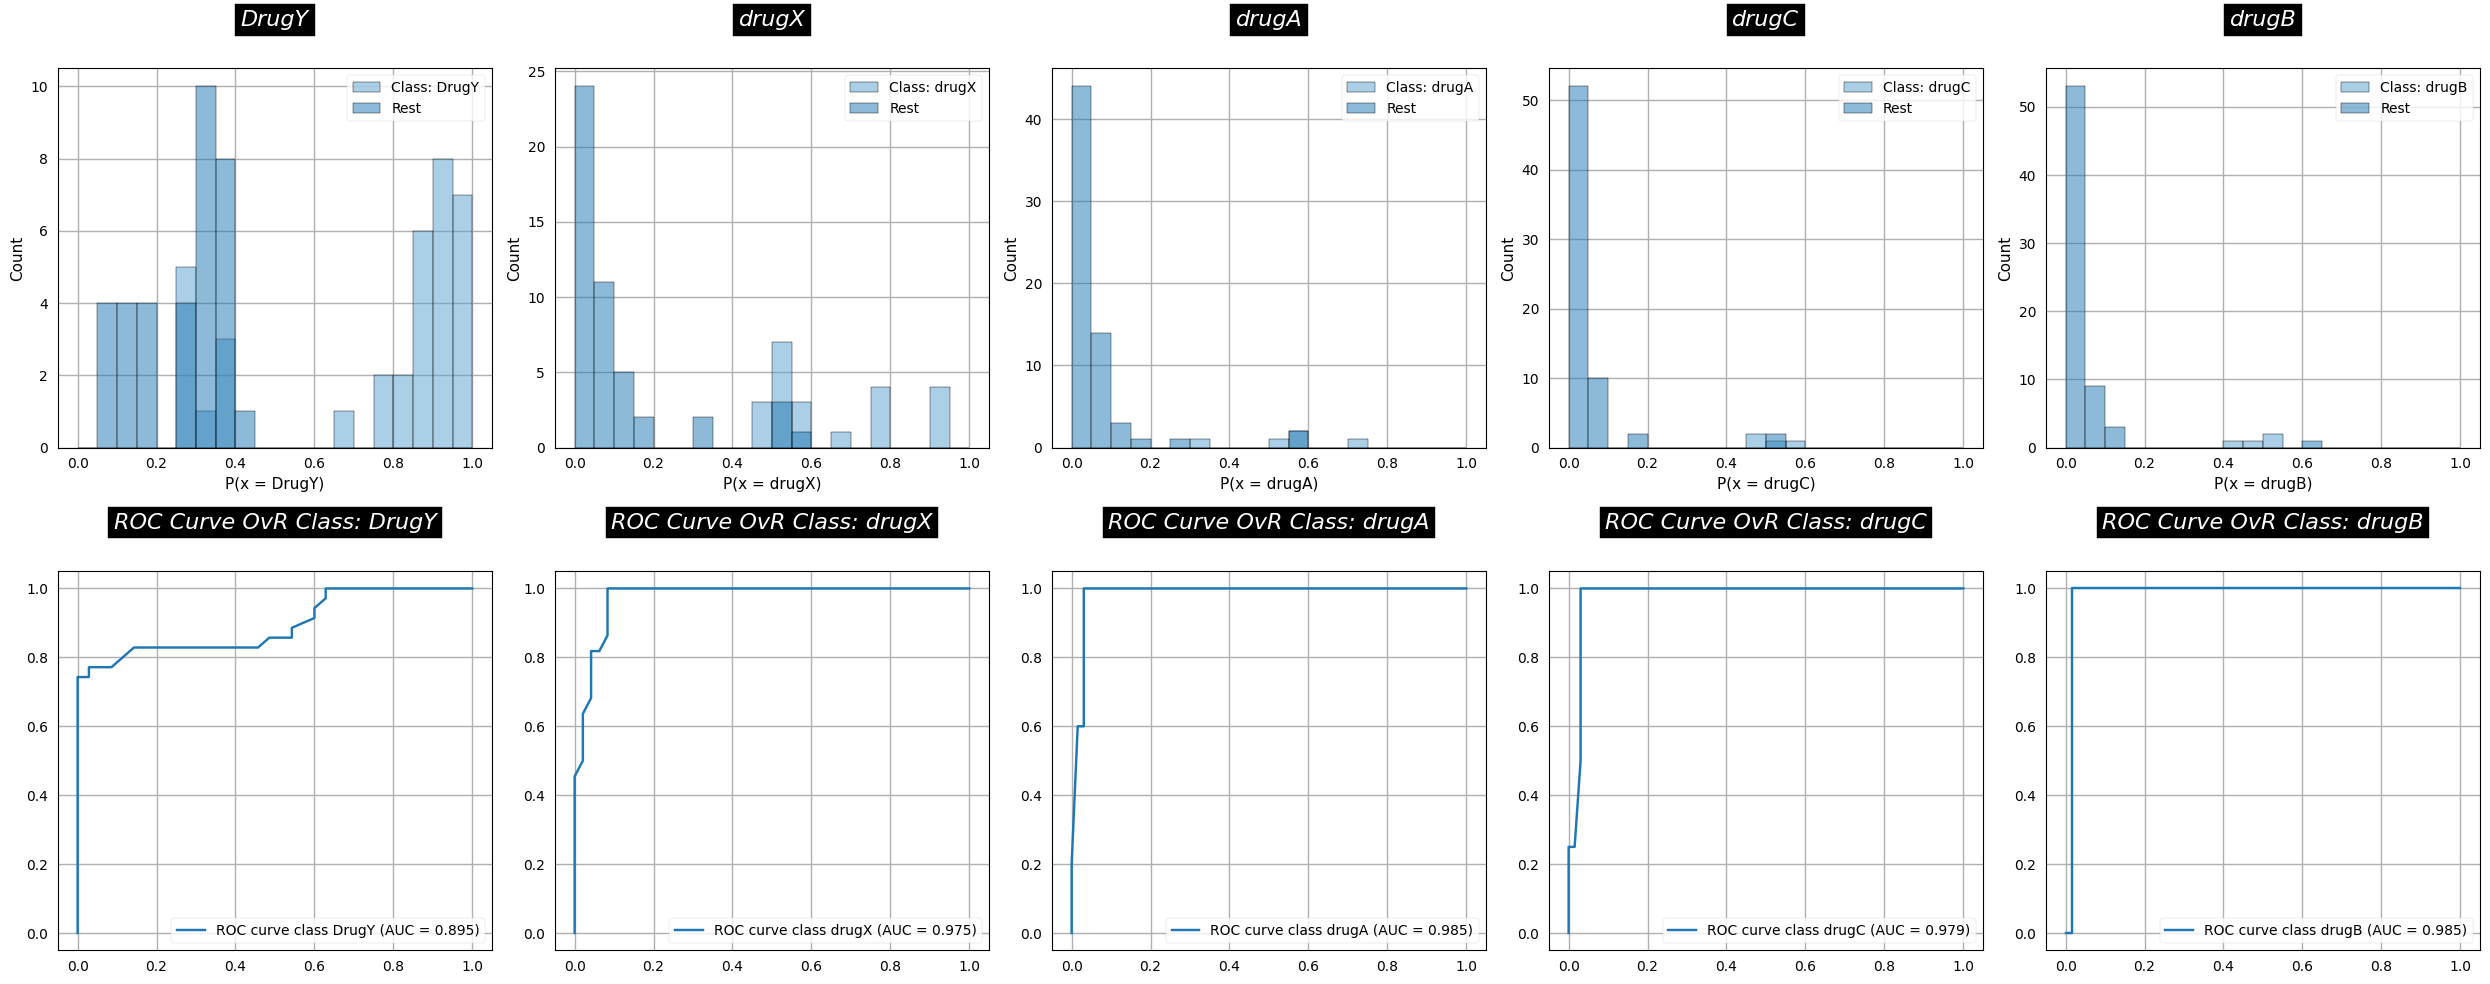

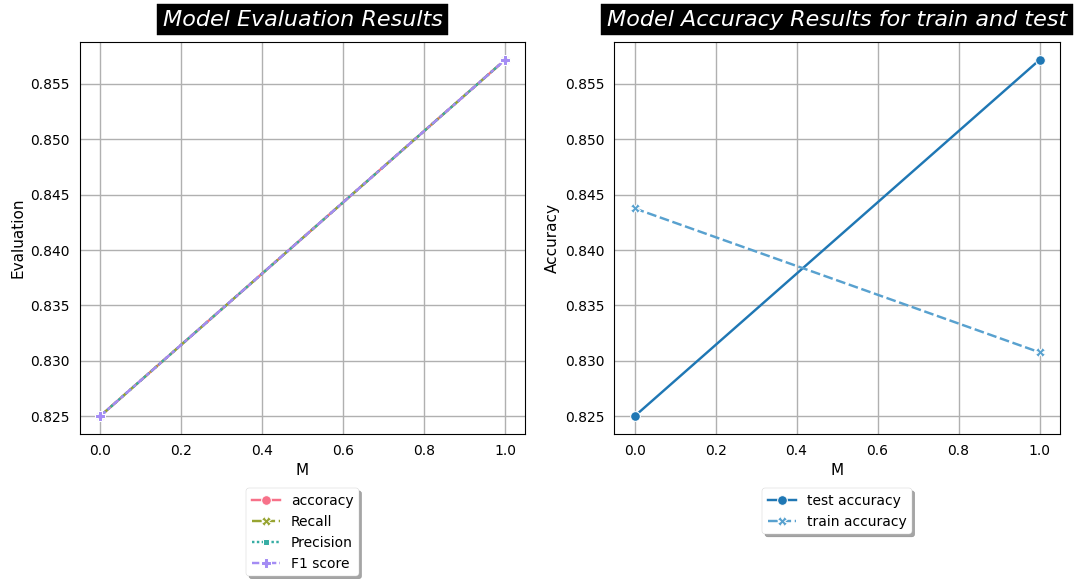

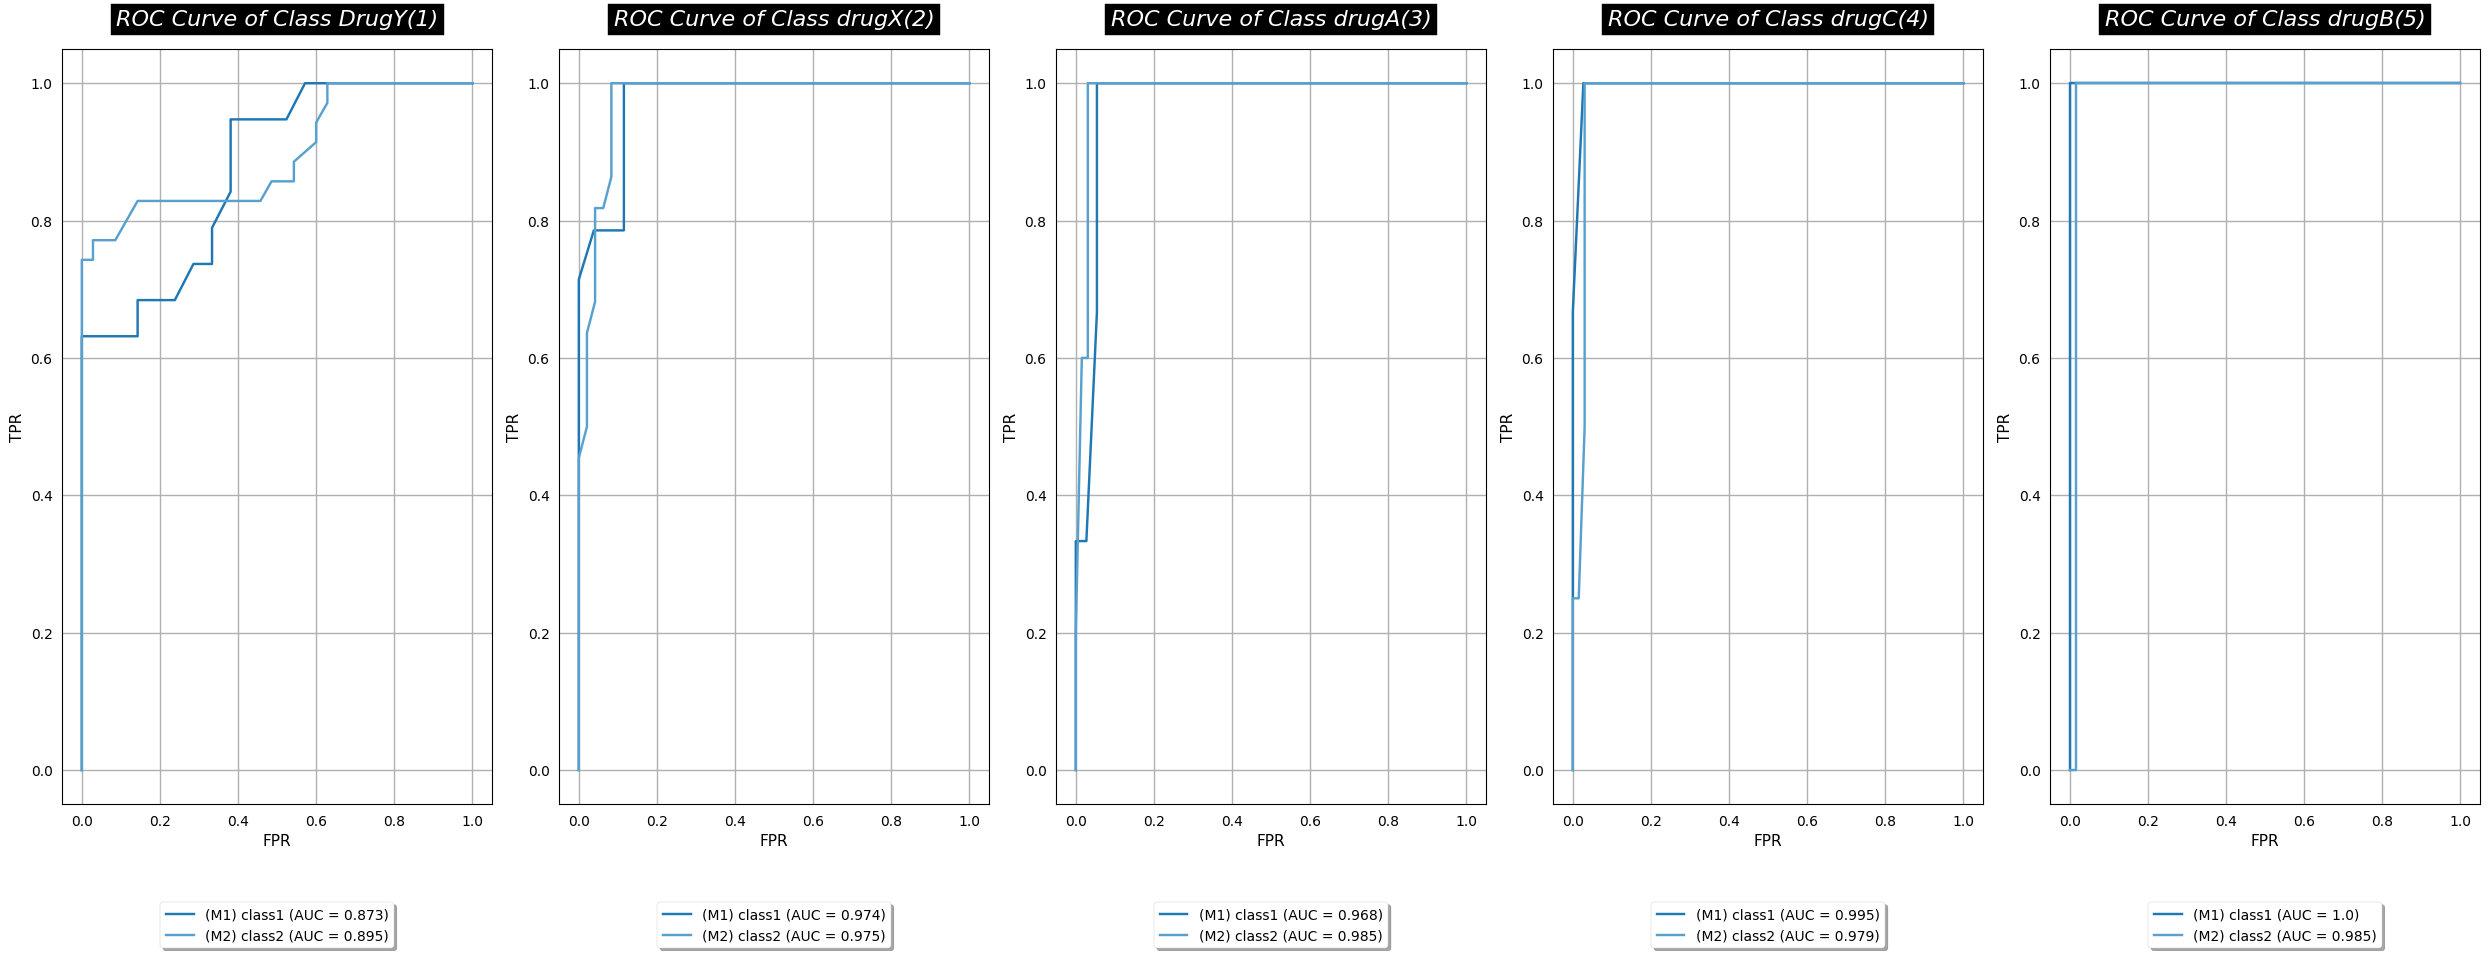

-------------------- Confusion Matrix --------------------
[[26  4  2  2  1]
 [ 0 22  0  0  0]
 [ 1  0  4  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  4]]


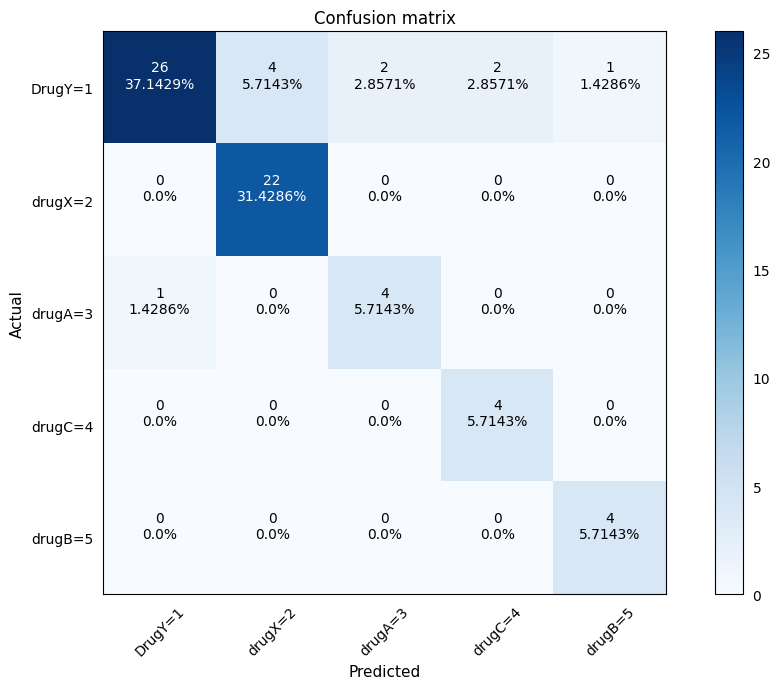

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           1       0.96      0.74      0.84        35
           2       0.85      1.00      0.92        22
           3       0.67      0.80      0.73         5
           4       0.67      1.00      0.80         4
           5       0.80      1.00      0.89         4

    accuracy                           0.86        70
   macro avg       0.79      0.91      0.83        70
weighted avg       0.88      0.86      0.86        70
 

Jaccard Score: 0.75 



In [64]:
%matplotlib inline
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
classes = {i+1:j for i,j in enumerate(df.Drug_Type.value_counts().index)}
columns= df4.drop('Drug_Type', axis=1).columns.tolist()
acc_test5_2, acc_train5_2, y_pred_2 = modeling(clf, x2, y2, 0.35, classes, columns)

In [65]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l2']
max_iter = [10000]
c_values = [100, 10, 1.0, 0.1, 0.01]
multi_classes = ['ovr','multinomia']
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values,multi_class=multi_classes, max_iter=max_iter)
cv = RepeatedStratifiedKFold(n_splits=10, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.35, random_state=0)
grid_result = grid_search.fit(x_train, y_train.ravel())
# summarize results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")

Best: 0.7192307692307692 using {'C': 10, 'max_iter': 10000, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
0.6915384615384614 (0.11331215720483927) with: {'C': 100, 'max_iter': 10000, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
0.6915384615384614 (0.11331215720483927) with: {'C': 100, 'max_iter': 10000, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}
0.6876923076923076 (0.1160595643848757) with: {'C': 100, 'max_iter': 10000, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
0.6907692307692308 (0.11251824309677876) with: {'C': 100, 'max_iter': 10000, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'sag'}
0.6907692307692308 (0.11251824309677876) with: {'C': 100, 'max_iter': 10000, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'saga'}
0.0 (0.0) with: {'C': 100, 'max_iter': 10000, 'multi_class': 'multinomia', 'penalty': 'l2', 'solver': 'newton-cg'}
0.0 (0.0) with: {'C': 100, 'max_iter': 10000, 'multi_class': 'multinomia', 'penalty'

In [66]:
clf = LogisticRegression(solver='liblinear', penalty='l2', C=10, multi_class='ovr', max_iter=10000)
Perform_cross_val(clf, 10, x2, y2, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.8100000000000002
CV results: [0.8  0.8  0.8  0.9  0.7  0.85 0.9  0.9  0.7  0.75]



In [68]:
delete_results()

In [69]:
def knn_model(x, y, Ks, test_size, show_plot=1):
    """fit knn algorithm, predict x_test and draw plots if you want

        x (DataFrame or array): features
        y (DataFrame or array): target
        test_size (float): parameter that use for split data to train and test set
        show_plot (1 or any): for draw plots

        Retrun Accuracy_train and Accuracy_test"""

    # split dataset
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    print('-'*20, 'Shape', '-'*20)
    print ('Train set:', x_train.shape,  y_train.shape)
    print ('Test set:', x_test.shape,  y_test.shape, '\n')

    # initial values
    Ks = Ks
    ACC_train = np.zeros((Ks))
    ACC_test = np.zeros((Ks))
    std_acc = np.zeros((Ks))

    # for loop for find best k
    for k in range(1,Ks+1):
        # train model and predict
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(x_train, y_train.ravel())
        y_pred_train = clf.predict(x_train)
        y_pred_test = clf.predict(x_test)
        ACC_train[k-1] = metrics.accuracy_score(y_train, y_pred_train)
        ACC_test[k-1] = metrics.accuracy_score(y_test, y_pred_test)
        std_acc[k-1]=np.std(y_pred_test==y_test)/np.sqrt(y_pred_test.shape[0])

    # draw plots
    if show_plot == 1:
        x = list(range(1,Ks+1))
        x_rev = x[::-1]

        # Train Accuracy line
        y1 = ACC_train
        y1_upper1 = list(ACC_train + 1 * std_acc)
        y1_upper2 = list(ACC_train + 3 * std_acc)
        y1_lower1 = list(ACC_train - 1 * std_acc)
        y1_lower1 = y1_lower1[::-1]
        y1_lower2 = list(ACC_train - 3 * std_acc)
        y1_lower2 = y1_lower2[::-1]

        # Test Accuracy line
        y2 = ACC_test
        y2_upper1 = list(ACC_test + 1 * std_acc)
        y2_upper2 = list(ACC_test + 3 * std_acc)
        y2_lower1 = list(ACC_test - 1 * std_acc)
        y2_lower1 = y2_lower1[::-1]
        y2_lower2 = list(ACC_test - 3 * std_acc)
        y2_lower2 = y2_lower2[::-1]

        fig = make_subplots(rows=1, cols=2, subplot_titles=("Train accuracy", "Test Accuracy"))

        # Train Accuracy plot
        fig.add_trace(go.Scatter(
            x=x+x_rev,
            y=y1_upper1+y1_lower1,
            fill='toself',
            fillcolor='rgba(0,100,80,0.3)',
            line_color='rgba(255,255,255,0)',
            showlegend=True,
            name='+/- 1xstd',
        ), row=1, col=1)

        fig.add_trace(go.Scatter(
            x=x+x_rev,
            y=y1_upper2+y1_lower2,
            fill='toself',
            fillcolor='rgba(0,100,80,0.2)',
            line_color='rgba(255,255,255,0)',
            showlegend=True,
            name='+/- 3xstd',
        ), row=1, col=1)

        fig.add_trace(go.Scatter(
            x=x, y=y1,
            line_color='rgb(0,100,80)',
            name='Train Accuracy',
        ), row=1, col=1)

        # Test Accuracy plot
        fig.add_trace(go.Scatter(
            x=x+x_rev,
            y=y2_upper1+y2_lower1,
            fill='toself',
            fillcolor='rgba(255,140,0,0.3)',
            line_color='rgba(255,255,255,0)',
            showlegend=True,
            name='+/- 1xstd',
        ), row=1, col=2)

        fig.add_trace(go.Scatter(
            x=x+x_rev,
            y=y2_upper2+y2_lower2,
            fill='toself',
            fillcolor='rgba(255,140,0,0.2)',
            line_color='rgba(255,255,255,0)',
            showlegend=True,
            name='+/- 3xstd',
        ), row=1, col=2)

        fig.add_trace(go.Scatter(
            x=x, y=y2,
            line_color='rgb(255,140,0)',
            name='Test Accuracy',
        ), row=1, col=2)

        # Update xaxis properties
        fig.update_xaxes(title_text="Number of Neighbors (k)", row=1, col=1)
        fig.update_xaxes(title_text="Number of Neighbors (k)", row=1, col=2)

        # Update yaxis properties
        fig.update_yaxes(title_text="Accuracy", row=1, col=1)
        fig.update_yaxes(title_text="Accuracy", row=1, col=2)

        fig.update_traces(mode='lines')
        fig.update_layout(title_text="Accuracy of KNN models for all k")
        fig.show()

    # print results
    print( f"The best train accuracy was {ACC_train.max()} with {ACC_train.argmax()+1}")
    print( f"The best test accuracy was {ACC_test.max()} with {ACC_test.argmax()+1}")

    return  ACC_test, ACC_train

In [70]:
acc_test6, acc_train6 = knn_model(x, y, 20, 0.2)

-------------------- Shape --------------------
Train set: (160, 18) (160, 1)
Test set: (40, 18) (40, 1) 



The best train accuracy was 0.90625 with 1
The best test accuracy was 0.75 with 8


In [71]:
test_sizes= [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
acc_table = pd.DataFrame(columns=['Model', 'test_size', 'k_train', 'ACC_train', 'k_test', 'ACC_test'])
for i, test_size in enumerate(test_sizes):
    acc_test_i, acc_train_i = knn_model(x, y, 10, test_size, show_plot=0)
    acc_table.loc[len(acc_table.index)] = [f"Model 6_{i}",
                                           str(test_size),
                                           str(acc_train_i.argmax()+1),
                                           acc_train_i.max(),
                                           str(acc_test_i.argmax()+1),
                                           acc_test_i.max(),
                                           ]
acc_table.sort_values(by=['ACC_test'], ascending=False).style.background_gradient(cmap='summer_r')

-------------------- Shape --------------------
Train set: (160, 18) (160, 1)
Test set: (40, 18) (40, 1) 

The best train accuracy was 0.90625 with 1
The best test accuracy was 0.75 with 8
-------------------- Shape --------------------
Train set: (150, 18) (150, 1)
Test set: (50, 18) (50, 1) 

The best train accuracy was 0.9066666666666666 with 1
The best test accuracy was 0.72 with 9
-------------------- Shape --------------------
Train set: (140, 18) (140, 1)
Test set: (60, 18) (60, 1) 

The best train accuracy was 0.9 with 1
The best test accuracy was 0.7333333333333333 with 6
-------------------- Shape --------------------
Train set: (130, 18) (130, 1)
Test set: (70, 18) (70, 1) 

The best train accuracy was 0.8923076923076924 with 1
The best test accuracy was 0.7571428571428571 with 4
-------------------- Shape --------------------
Train set: (120, 18) (120, 1)
Test set: (80, 18) (80, 1) 

The best train accuracy was 0.9 with 1
The best test accuracy was 0.6875 with 5
-----------

In [72]:
acc_test6_2, acc_train6_2 = knn_model(x, y, 10, 0.35)

-------------------- Shape --------------------
Train set: (130, 18) (130, 1)
Test set: (70, 18) (70, 1) 



The best train accuracy was 0.8923076923076924 with 1
The best test accuracy was 0.7571428571428571 with 4


In [73]:
clf = KNeighborsClassifier(n_neighbors=4)
Perform_cross_val(clf, 10, x, y, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.6349999999999999
CV results: [0.7  0.5  0.7  0.65 0.65 0.75 0.7  0.5  0.6  0.6 ]



In [74]:
best_model_test.loc[len(best_model_test.index)] = [f"KNN (by k=4)", '0.35', acc_test6_2.max()]
best_model_train.loc[len(best_model_train.index)] = [f"KNN (by k=4)", '0.35', acc_train6_2.max()]

In [75]:
best_model_test.sort_values(by=['Test_Accuracy'], ascending=False).reset_index(drop=True).style.background_gradient(cmap='summer_r')

In [76]:
df2

Age  Sex  BP  Cholesterol  Na_to_K  Drug_Type
0     23    2   4            3   25.355          1
1     47    3   2            3   13.093          4
2     47    3   2            3   10.114          4
3     28    2   3            3    7.798          2
4     61    2   2            3   18.043          1
..   ...  ...  ..          ...      ...        ...
195   56    2   2            3   11.567          4
196   16    3   2            3   12.006          4
197   52    3   3            3    9.894          2
198   23    3   3            2   14.020          2
199   40    2   2            2   11.349          2

[200 rows x 6 columns]

In [77]:
x_visual = df2.drop('Drug_Type', axis=1)
y_visual = df2.Drug_Type.values.reshape(-1,1)

In [83]:
df2

Age  Sex  BP  Cholesterol  Na_to_K  Drug_Type
0     23    2   4            3   25.355          1
1     47    3   2            3   13.093          4
2     47    3   2            3   10.114          4
3     28    2   3            3    7.798          2
4     61    2   2            3   18.043          1
..   ...  ...  ..          ...      ...        ...
195   56    2   2            3   11.567          4
196   16    3   2            3   12.006          4
197   52    3   3            3    9.894          2
198   23    3   3            2   14.020          2
199   40    2   2            2   11.349          2

[200 rows x 6 columns]

<Axes: xlabel='Drug_Type', ylabel='Age'>

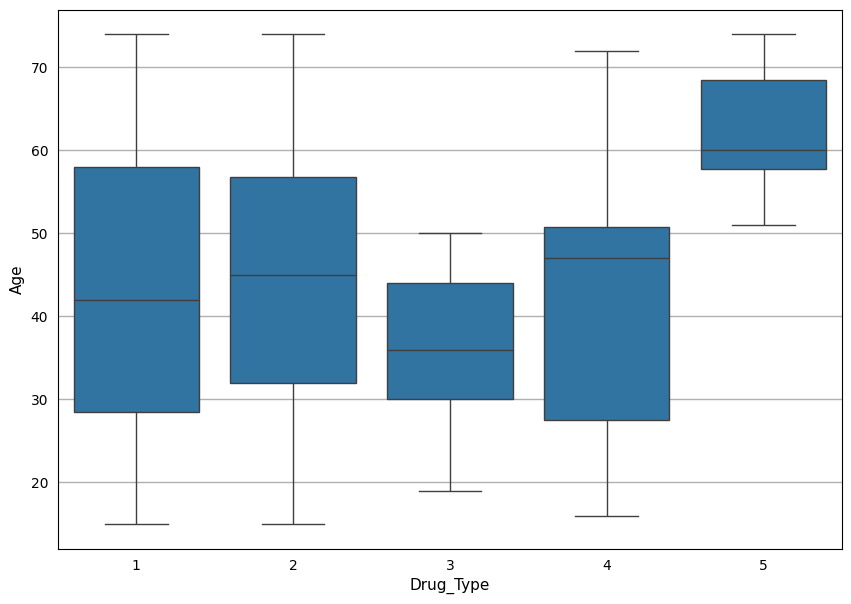

In [85]:
# @title Boxplot of Age by Drug_Type

sns.boxplot(data=df2, x="Drug_Type", y="Age")

In [84]:
# fit final model on all of data (train + test)
final_model = LogisticRegression(solver='liblinear', penalty='l2', C=10, multi_class='ovr', max_iter=10000)
final_model.fit(x2, y2.ravel())

# define sample data
sample = pd.DataFrame({'Age':[53], 'Sex':'M', 'BP':'HIGH', 'Cholesterol':'NORMAL', 'Na_to_K':[16.5]})
print(f"Age: {sample['Age'].values[0]}\n"
      f"Sex: {sample['Sex'].values[0]}\n"
      f"BP: {sample['BP'].values[0]}\n"
      f"Cholesterol: {sample['Cholesterol'].values[0]}\n"
      f"Na_to_K: {sample['Na_to_K'].values[0]}")

# standardize and prepare sample data for predicting by final model
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
sample['Na_to_K_binned'] = pd.cut(sample['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
sample = sample.drop(['Na_to_K'], axis = 1)

bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
sample['Age_binned'] = pd.cut(sample['Age'], bins=bin_age, labels=category_age)
sample = sample.drop(['Age'], axis = 1)

sample = pd.get_dummies(sample)
sample_df = pd.DataFrame({col:[] for col in df4.drop('Drug_Type', axis=1).columns.tolist()})
sample_df.loc[len(sample_df.index)] = {key:value[0] for key, value in sample.items()}
sample_df = sample_df.fillna(0).astype('int8')

# predict sample data
result = final_model.predict(sample_df)
result = pd.DataFrame(result).replace([1, 2, 3, 4, 5], ['DrugY', 'drugX', 'drugA', 'drugC', 'drugB']).iloc[0,0]
print('='*38)
print(f"Predicted drug is: {result}")

Age: 53
Sex: M
BP: HIGH
Cholesterol: NORMAL
Na_to_K: 16.5
Predicted drug is: drugB
